<html>

<head>
<meta charset="UTF-8">
<title>Title of the document</title>
</head>

<body>
<h1 id="title">Plots from X-ray absorption calculations using ORCA</h1>
<p>Presentation of the feature engineering applied for ORCA outputs</p>
<p>Data presented here, as new inputs for this jupyter-notebook, comes from the written-shell pipeline created to extract X-ray excited-state features from some specific pair of atoms group (e.g. pair amino acid).</p>
<p>Outputs here are filtered features that account for specific transitions (coreMO -> virtualMO) for the specific pair of atoms group.</p>
</body>
</html>

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import csv as csv
from matplotlib.pyplot import figure
from __future__ import print_function
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

____________________________

In [173]:
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [174]:
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18

--------------

<html>

<head>
<meta charset="UTF-8">
<title>Title of the document</title>
</head>

<body>
<h1 id="title">Löwdin Population analysis from </h1>
<h2 id="title"> X-ray absorption spectra calculated using PNO-DFT/ROCIS zora </h2>
<h3 id="title">    System of study: F ${---}$Y</h3>
<h4 id="title">   non-covalent interaction distances varying from 2,5 to 11,0 $\dot{A}$ </h4>
</body>
</html>


#### Loading matrices (data from the pipeline's outputs)
Data in .csv format
##### residue called as A is acting as one at the ground state amino acid
> ##### resA core MO
##### residue called as B is acting as one at the virtual state amino acid
> ##### resB virtual MO

In a pair-aa interaction, e.g. Phe-Tyr, Phenylalanine stands for resA core MO and Tyrosine for resB virtual MO. And after, Tyrosine stands for resA core MO and Phenylalanine for resB virtual MO. Both are calculated and are within the spectra.

> ##### resA core MO - Phenylalanine

In [175]:
#Uncomment the original range to see more peaks outside the expected range
resa_phe="pop_matrices/resA_MOcore_FY_"
resa_tyr="pop_matrices/resA_MOcore_YF_"
post=".csv"
#list_suf = [25, 26, 27, 28, 29, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
l_tmp = [85, 90, 95, 100, 105, 110]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)
for ii in list_suf:
    globals()['resa_mocore_%s_FY_raw' % str(ii)] = pd.read_csv(resa_phe+str(ii)+post, delimiter=',', index_col='num-1')
    globals()['resa_mocore_%s_YF_raw' % str(ii)] = pd.read_csv(resa_tyr+str(ii)+post, delimiter=',', index_col='num-1')

#resa_mocore_27_FY_raw#.head()

> ##### resB virt MO - Tyrosine

In [176]:
resb_tyr="pop_matrices/resB_MOcore_FY_"
resb_phe="pop_matrices/resB_MOcore_YF_"
post=".csv"
for ii in list_suf:
    globals()['resb_movirt_%s_FY_raw' % str(ii)] = pd.read_csv(resb_tyr+str(ii)+post, delimiter=',', index_col='num-1')
    globals()['resb_movirt_%s_YF_raw' % str(ii)] = pd.read_csv(resb_phe+str(ii)+post, delimiter=',', index_col='num-1')

#resb_movirt_25_YF_raw#.head()

<html>


<body>
<h1 id="title">Features from  X-ray excited-state properties: </h1>
<h2 id="title">1. The number of transitions </h2>
<h2 id="title">2. The transitions averaged probability </h2>
<h2 id="title">3. The oscillator strength using electronic dipole moment as operator </h2>
<h2 id="title">4. The oscillator strength using velocity dipole moment as operator </h2>
</body>
</html>

#### coreMO vs. virtual MO (core/virt MO)
#### resA(Phe) --> resB(Tyr)

> ### 1. core/virt MO as function of the number of transitions

In [177]:
resab_fy="pop_matrices/corevirtMO_matrix_FY_"#same as YF
post=".csv"
post2="_1st.csv"
post3="_2nd.csv"
post4="_3rd.csv"
for ii in list_suf:
    globals()['corevirtMO_matrix_%s_FY_raw' % str(ii)] = pd.read_csv(resab_fy+str(ii)+post, delimiter=',', index_col='virt\core')
    globals()['corevirtMO_matrix_%s_FY_raw_1' % str(ii)] = pd.read_csv(resab_fy+str(ii)+post2, delimiter=',', index_col='virt\core')
    globals()['corevirtMO_matrix_%s_FY_raw_2' % str(ii)] = pd.read_csv(resab_fy+str(ii)+post3, delimiter=',', index_col='virt\core')
    globals()['corevirtMO_matrix_%s_FY_raw_3' % str(ii)] = pd.read_csv(resab_fy+str(ii)+post4, delimiter=',', index_col='virt\core')

#corevirtMO_matrix_27_FY_raw.head()

> ### 2. core/virt MO as function of the number of transitions averaged probability

In [178]:
resab_ts_fy="pop_matrices/corevirtMO_matrix_tspb_FY_"#same as YF
post=".csv"
for ii in list_suf:
    globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)] = pd.read_csv(resab_ts_fy+str(ii)+post, delimiter=',', index_col='virt\core')
    globals()['corevirtMO_matrix_tspb_%s_FY_raw_1' % str(ii)] = pd.read_csv(resab_ts_fy+str(ii)+post2, delimiter=',', index_col='virt\core')
    globals()['corevirtMO_matrix_tspb_%s_FY_raw_2' % str(ii)] = pd.read_csv(resab_ts_fy+str(ii)+post3, delimiter=',', index_col='virt\core')
    globals()['corevirtMO_matrix_tspb_%s_FY_raw_3' % str(ii)] = pd.read_csv(resab_ts_fy+str(ii)+post4, delimiter=',', index_col='virt\core')

#corevirtMO_matrix_tspb_27_FY_raw.head()

> ### 3. core/virt MO as function of the oscillator strength using electronic dipole moment as operator
> #### by weighted (WSM) sum and weighted average (WAM)

In [179]:
resab_fosce_fy="pop_matrices/corevirt_fosce_FY_"#same as YF
resab_foscwe_fy="pop_matrices/corevirt_foscwe_FY_"
post=".csv"
for ii in list_suf:
    globals()['corevirt_mo_fosce_%s_FY_raw' % str(ii)] = pd.read_csv(resab_fosce_fy+str(ii)+post, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_foscwe_%s_FY_raw' % str(ii)] = pd.read_csv(resab_foscwe_fy+str(ii)+post, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_fosce_%s_FY_raw_1' % str(ii)] = pd.read_csv(resab_fosce_fy+str(ii)+post2, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_foscwe_%s_FY_raw_1' % str(ii)] = pd.read_csv(resab_foscwe_fy+str(ii)+post2, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_fosce_%s_FY_raw_2' % str(ii)] = pd.read_csv(resab_fosce_fy+str(ii)+post3, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_foscwe_%s_FY_raw_2' % str(ii)] = pd.read_csv(resab_foscwe_fy+str(ii)+post3, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_fosce_%s_FY_raw_3' % str(ii)] = pd.read_csv(resab_fosce_fy+str(ii)+post4, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_foscwe_%s_FY_raw_3' % str(ii)] = pd.read_csv(resab_foscwe_fy+str(ii)+post4, delimiter=',', index_col='virt\core')

#corevirt_mo_fosce_27_FY_raw.head()

In [180]:
corevirt_mo_foscwe_27_FY_raw_2

,7,8,12,13,17,18,20,21
virt\core,,,,,,,,
92,0.000012,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
93,0.069365,0.000000,0.119678,0.069365,0.069365,0.000000,0.048283,0.044185
94,0.069365,0.032147,0.144119,0.000000,0.069365,0.032147,0.004898,0.003545
95,0.069365,0.032147,0.000000,0.000000,0.069365,0.032147,0.050037,0.000000


> ### 4. core/virt MO as function of the oscillator strength using velocity dipole moment as operator
> #### by weighted (WSM) sum and weighted average (WAM)

In [181]:
resab_foscv_fy="pop_matrices/corevirt_foscv_FY_"#same as YF
resab_foscwv_fy="pop_matrices/corevirt_foscwv_FY_"
post=".csv"
for ii in list_suf:
    globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)] = pd.read_csv(resab_foscv_fy+str(ii)+post, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_foscwv_%s_FY_raw' % str(ii)] = pd.read_csv(resab_foscwv_fy+str(ii)+post, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_foscv_%s_FY_raw_1' % str(ii)] = pd.read_csv(resab_foscv_fy+str(ii)+post2, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_foscwv_%s_FY_raw_1' % str(ii)] = pd.read_csv(resab_foscwv_fy+str(ii)+post2, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_foscv_%s_FY_raw_2' % str(ii)] = pd.read_csv(resab_foscv_fy+str(ii)+post3, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_foscwv_%s_FY_raw_2' % str(ii)] = pd.read_csv(resab_foscwv_fy+str(ii)+post3, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_foscv_%s_FY_raw_3' % str(ii)] = pd.read_csv(resab_foscv_fy+str(ii)+post4, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_foscwv_%s_FY_raw_3' % str(ii)] = pd.read_csv(resab_foscwv_fy+str(ii)+post4, delimiter=',', index_col='virt\core')

#corevirt_mo_foscv_27_FY_raw.head()

### Main functions to present data according to the features

In [182]:
def selecting_atm_matrix(df, atoms_list):
    """
    it returns MO matrix (df) having just the atoms in atoms_list.
    """
    col_list = df.index.tolist() #listing index (elements from column 0)
    #dff = df.loc[:, (df != 0).any(axis=0)] #removing zero columns
    return df.loc[[i for i in atoms_list if i in col_list]] #returning just columns in the both lists intersection
#atoms_core=resa_mocore_GFG9Y_raw.index.tolist() #all C-core atoms

In [183]:
def nonzero_mo_matrix(df):
    """
    it returns MO matrix (df) having just non-zero MO population.
    """
    return df.loc[:, (df != 0).any(axis=0)] #removing zero columns

In [184]:
def crop_by_loewdin_p(df,pop):
    """
    it returns MO matrix (df) having just a Loewdin MO population contribution greater than (100*pop)%.
    pop is a number between 0 and 1.
    """
    cols = [col for col, val in df.sum()[2:].iteritems() if val > (pop*100)]
    #iteritem() create a zip with the index_col and the values
    cols.insert(0,'lvl')
    cols.insert(0,'sym')
    #to add on the top the first two columns removed in the previous sum() evaluation
    return df[cols] #showing the fisrt two columns and those having population greater than pop*100%

In [185]:
def cropping_matrix(df, df1, df2):
    """
    it returns a cropped MO matrix from df using as parameters the indices in df1 and df2.
    df1 index are column names from df and df2 index are the rows from df
    """
    try:
        dff = df[df1.axes[1][2:].tolist()] #saving specific columns
    except KeyError:
        tmp_mo = [item for item in df1.axes[1][2:].tolist() if item in df.axes[1][2:].tolist()]
        #removing items in the first list that are not in the second one
        dff = df[tmp_mo]
    try:
        return dff.loc[[int(i) for i in df2.axes[1][2:].tolist()]] #returning specific rows
    except KeyError:
        tmp_mo2 = [item for item in df2.axes[1][2:].tolist() if item in dff.T.axes[1][2:].tolist()]
        # dff.T to obtain the index_col as the head row
        return dff.loc[[int(i) for i in tmp_mo2]] #returning specific rows
# the first two elements in df2.axes[1] and df1.axes[1] are "sym" and "lvl", that's why I used df.axes[1][2:]

<html>


<body>
<h3 id="title">Reducing Löwdin Population MO matrices by removing non-contributing MO</h3>
<h4> Case for core MO in the resA</h4>
</body>
</html>

In [186]:
for ii in list_suf:
    globals()['resa_mocore_%s_FY' % str(ii)] = nonzero_mo_matrix(globals()['resa_mocore_%s_FY_raw' % str(ii)])
    globals()['resa_mocore_%s_YF' % str(ii)] = nonzero_mo_matrix(globals()['resa_mocore_%s_YF_raw' % str(ii)])

#resa_mocore_27_FY.head()

<html>

<body>
<h4> Case for virtual MO in the resB</h4>
</body>
</html>
<html>

In [187]:
for ii in list_suf:
    globals()['resb_movirt_%s_FY' % str(ii)] = nonzero_mo_matrix(globals()['resb_movirt_%s_FY_raw' % str(ii)])
    globals()['resb_movirt_%s_YF' % str(ii)] = nonzero_mo_matrix(globals()['resb_movirt_%s_YF_raw' % str(ii)])

#resb_movirt_27_FY#.head()

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">Reducing further resB Löwdin Population MO by just considering upper 67% population contribution</h4>
</body>
</html>

In [188]:
#for counting transitions in MO having greater than 67% of Loewdin population contribution in resB
pop = 0.01
for ii in list_suf:
    globals()['resb_movirt_%s_FY_pop' % str(ii)] = crop_by_loewdin_p(globals()['resb_movirt_%s_FY_raw' % str(ii)],pop)
    globals()['resb_movirt_%s_YF_pop' % str(ii)] = crop_by_loewdin_p(globals()['resb_movirt_%s_YF_raw' % str(ii)],pop)

resb_movirt_25_FY_pop#.head()

,sym,lvl,92,93,94,95,96,97,98,99,100,101,102,103
num-1,,,,,,,,,,,,,,
23,atom,lvlMO,0.0,0.0,0.0,0.0,0.9,3.0,0.4,1.4,3.1,1.3,1.2,1.0
24,atom,lvlMO,0.4,0.8,0.0,0.1,2.0,3.7,0.6,2.0,4.0,1.3,0.5,2.1
25,atom,lvlMO,0.2,0.0,0.0,0.0,1.0,21.2,1.6,17.7,1.6,6.2,2.6,1.1
26,atom,lvlMO,0.0,0.0,0.0,0.0,0.3,9.6,0.9,7.8,1.1,2.9,1.4,0.2
27,atom,lvlMO,0.0,0.0,0.0,0.0,0.3,7.4,0.9,9.2,1.0,1.3,0.9,0.4
28,atom,lvlMO,0.2,1.0,0.0,0.0,2.5,2.8,0.5,1.3,1.2,1.0,1.3,1.8
29,atom,lvlMO,1.2,10.1,0.1,0.6,0.5,0.4,0.3,0.6,0.6,0.6,0.3,2.7
30,atom,lvlMO,8.4,7.6,0.6,0.1,1.1,0.8,1.3,1.2,3.9,0.6,0.5,0.8
31,atom,lvlMO,13.3,1.7,0.1,0.5,2.9,0.9,2.5,0.5,1.1,0.1,0.8,3.4


<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h3 id="title">Cropping core virtual MO matrices by resA and resB matrices boundaries:</h3>
</body>
</html>

> ### 1st. feature: core/virt MO as function of the number of transitions

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB having just contributing MO</h4>
</body>
</html>

In [189]:
for ii in list_suf:
    globals()['core_virt_mo_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['core_virt_mo_%s_YF' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['core_virt_mo_%s_FY_1' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['core_virt_mo_%s_YF_1' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['core_virt_mo_%s_FY_2' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['core_virt_mo_%s_YF_2' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['core_virt_mo_%s_FY_3' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['core_virt_mo_%s_YF_3' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])

#core_virt_mo_27_FY.head()

In [190]:
core_virt_mo_27_FY

,7,11,12,13,14,17,18,20,21
virt\core,,,,,,,,,
92,3,1,1,4,3,2,1,2,5
93,5,2,1,5,4,4,1,4,4
94,5,2,1,6,5,4,2,4,4
95,5,1,1,5,5,4,3,4,4
96,5,1,1,4,4,4,2,4,5
97,4,1,1,3,4,3,1,3,4
98,7,1,2,6,2,6,4,3,4
99,6,2,2,2,2,4,2,3,3
100,7,2,3,2,3,5,2,3,3


<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB, when resB has just upper a set percentage of MO contribution</h4>
</body>
</html>

In [191]:
for ii in list_suf:
    globals()['core_virt_mo_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['core_virt_mo_%s_YF_pop' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['core_virt_mo_%s_FY_pop_1' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['core_virt_mo_%s_YF_pop_1' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['core_virt_mo_%s_FY_pop_2' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['core_virt_mo_%s_YF_pop_2' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['core_virt_mo_%s_FY_pop_3' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['core_virt_mo_%s_YF_pop_3' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])

#core_virt_mo_27_FY_pop.head()

> ### 2nd. feature: core/virt MO as function of the number of transitions averaged probability

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB having just contributing MO</h4>
</body>
</html>

In [192]:
for ii in list_suf:
    globals()['corevirtMO_matrix_tspb_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_YF' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_FY_1' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_YF_1' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_FY_2' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_YF_2' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_FY_3' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_YF_3' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])

#corevirtMO_matrix_tspb_27_FY.head()

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB, when resB has just upper a set percentage of MO contribution</h4>
</body>
</html>

In [193]:
for ii in list_suf:
    globals()['corevirtMO_matrix_tspb_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_YF_pop' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_FY_pop_1' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_YF_pop_1' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_FY_pop_2' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_YF_pop_2' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_FY_pop_3' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_YF_pop_3' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])

#corevirtMO_matrix_tspb_27_FY_pop.head()

> ### 3. core/virt MO as function of the oscillator strength using electronic dipole moment as operator
> #### by weighted (WSM) sum and weighted average (WAM)

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB having just contributing MO</h4>
</body>
</html>

In [194]:
for ii in list_suf:
    globals()['corevirt_mo_fosce_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_fosce_%s_YF' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_YF' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirt_mo_fosce_%s_FY_1' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_fosce_%s_YF_1' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_FY_1' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_YF_1' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirt_mo_fosce_%s_FY_2' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_fosce_%s_YF_2' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_FY_2' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_YF_2' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirt_mo_fosce_%s_FY_3' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_fosce_%s_YF_3' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_FY_3' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_YF_3' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])

#corevirt_mo_fosce_27_FY.head()

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB, when resB has just upper a set percentage of MO contribution</h4>
</body>
</html>

In [195]:
for ii in list_suf:
    globals()['corevirt_mo_fosce_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_fosce_%s_YF_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_YF_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirt_mo_fosce_%s_FY_pop_1' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_fosce_%s_YF_pop_1' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_FY_pop_1' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_YF_pop_1' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirt_mo_fosce_%s_FY_pop_2' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_fosce_%s_YF_pop_2' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_FY_pop_2' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_YF_pop_2' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirt_mo_fosce_%s_FY_pop_3' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_fosce_%s_YF_pop_3' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_FY_pop_3' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_YF_pop_3' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])

#corevirt_mo_fosce_27_FY_pop.head()

> ### 4. core/virt MO as function of the oscillator strength using velocity dipole moment as operator
> #### by weighted (WSM) sum and weighted average (WAM)

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB having just contributing MO</h4>
</body>
</html>

In [196]:
for ii in list_suf:
    globals()['corevirt_mo_foscv_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_foscv_%s_YF' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_YF' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirt_mo_foscv_%s_FY_1' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_foscv_%s_YF_1' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_FY_1' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_YF_1' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])    
    globals()['corevirt_mo_foscv_%s_FY_2' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_foscv_%s_YF_2' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_FY_2' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_YF_2' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])    
    globals()['corevirt_mo_foscv_%s_FY_3' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_foscv_%s_YF_3' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_FY_3' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_YF_3' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])    

#corevirt_mo_foscv_25_FY.head()

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB, when resB has just upper a set percentage of MO contribution</h4>
</body>
</html>

In [197]:
for ii in list_suf:
    globals()['corevirt_mo_foscv_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_foscv_%s_YF_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_YF_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirt_mo_foscv_%s_FY_pop_1' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_foscv_%s_YF_pop_1' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_FY_pop_1' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_YF_pop_1' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw_1' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirt_mo_foscv_%s_FY_pop_2' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_foscv_%s_YF_pop_2' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_FY_pop_2' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_YF_pop_2' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw_2' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirt_mo_foscv_%s_FY_pop_3' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_foscv_%s_YF_pop_3' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_FY_pop_3' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_YF_pop_3' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw_3' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])

#corevirt_mo_foscv_25_FY_pop.head()

In [198]:
corevirt_mo_foscwv_25_FY_pop_3

,7,11,12,13,14,16,19,20,21,23
virt\core,,,,,,,,,,


___________________________

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h3 id="title">Results</h3>
<h4 id="title">Features presentation</h4>
</body>
</html>

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">Pair-aa distance in Å</h4>
</body>
</html>

> ##### 1st feature by a set percentage population

In [199]:
for ii in list_suf:
    ts_n_fy=globals()['core_virt_mo_%s_FY_pop' % str(ii)].sum().sum()
    ts_n_yf=globals()['core_virt_mo_%s_YF_pop' % str(ii)].sum().sum()
    print(f"Dist.: {ii/10} transitions number. F->Y: {ts_n_fy} Y->F: {ts_n_yf}; \
    F->Y: {(ts_n_fy*100)/(ts_n_fy+ts_n_yf):.2f} Y->F: {(ts_n_yf*100)/(ts_n_fy+ts_n_yf):.2f}")


Dist.: 2.5 transitions number. F->Y: 276 Y->F: 282;     F->Y: 49.46 Y->F: 50.54
Dist.: 2.6 transitions number. F->Y: 276 Y->F: 297;     F->Y: 48.17 Y->F: 51.83
Dist.: 2.7 transitions number. F->Y: 349 Y->F: 333;     F->Y: 51.17 Y->F: 48.83
Dist.: 2.8 transitions number. F->Y: 309 Y->F: 269;     F->Y: 53.46 Y->F: 46.54
Dist.: 2.9 transitions number. F->Y: 392 Y->F: 270;     F->Y: 59.21 Y->F: 40.79
Dist.: 3.0 transitions number. F->Y: 493 Y->F: 436;     F->Y: 53.07 Y->F: 46.93
Dist.: 3.1 transitions number. F->Y: 425 Y->F: 353;     F->Y: 54.63 Y->F: 45.37
Dist.: 3.2 transitions number. F->Y: 436 Y->F: 383;     F->Y: 53.24 Y->F: 46.76
Dist.: 3.3 transitions number. F->Y: 449 Y->F: 376;     F->Y: 54.42 Y->F: 45.58
Dist.: 3.4 transitions number. F->Y: 387 Y->F: 330;     F->Y: 53.97 Y->F: 46.03
Dist.: 3.5 transitions number. F->Y: 385 Y->F: 354;     F->Y: 52.10 Y->F: 47.90
Dist.: 3.6 transitions number. F->Y: 393 Y->F: 317;     F->Y: 55.35 Y->F: 44.65
Dist.: 3.7 transitions number. F->Y: 505

In [200]:
for ii in list_suf:
    ts_n_fy=globals()['core_virt_mo_%s_FY_pop_3' % str(ii)].sum().sum()
    ts_n_yf=globals()['core_virt_mo_%s_YF_pop_3' % str(ii)].sum().sum()
    print(f"Dist.: {ii/10} transitions number. F->Y: {ts_n_fy} Y->F: {ts_n_yf}; \
    F->Y: {(ts_n_fy*100)/(ts_n_fy+ts_n_yf):.2f} Y->F: {(ts_n_yf*100)/(ts_n_fy+ts_n_yf):.2f}")


Dist.: 2.5 transitions number. F->Y: 0.0 Y->F: 0.0;     F->Y: nan Y->F: nan
Dist.: 2.6 transitions number. F->Y: 0.0 Y->F: 0.0;     F->Y: nan Y->F: nan
Dist.: 2.7 transitions number. F->Y: 0.0 Y->F: 0.0;     F->Y: nan Y->F: nan
Dist.: 2.8 transitions number. F->Y: 0.0 Y->F: 0.0;     F->Y: nan Y->F: nan
Dist.: 2.9 transitions number. F->Y: 0.0 Y->F: 0.0;     F->Y: nan Y->F: nan
Dist.: 3.0 transitions number. F->Y: 0.0 Y->F: 0.0;     F->Y: nan Y->F: nan
Dist.: 3.1 transitions number. F->Y: 0.0 Y->F: 0.0;     F->Y: nan Y->F: nan
Dist.: 3.2 transitions number. F->Y: 0.0 Y->F: 0.0;     F->Y: nan Y->F: nan
Dist.: 3.3 transitions number. F->Y: 0.0 Y->F: 0.0;     F->Y: nan Y->F: nan
Dist.: 3.4 transitions number. F->Y: 0.0 Y->F: 0.0;     F->Y: nan Y->F: nan
Dist.: 3.5 transitions number. F->Y: 0.0 Y->F: 0.0;     F->Y: nan Y->F: nan
Dist.: 3.6 transitions number. F->Y: 0.0 Y->F: 0.0;     F->Y: nan Y->F: nan
Dist.: 3.7 transitions number. F->Y: 0.0 Y->F: 0.0;     F->Y: nan Y->F: nan
Dist.: 3.8 t

/tmp/ipykernel_29726/1595351073.py:4: RuntimeWarning: invalid value encountered in double_scalars
  print(f"Dist.: {ii/10} transitions number. F->Y: {ts_n_fy} Y->F: {ts_n_yf}; \


##### 2nd feature by a set percentage population

In [201]:
for ii in list_suf:
    tspb_n_fy=globals()['corevirtMO_matrix_tspb_%s_FY_pop' % str(ii)].sum().sum()
    tspb_n_yf=globals()['corevirtMO_matrix_tspb_%s_YF_pop' % str(ii)].sum().sum()
    print(f"Dist.: {ii/10} sum of WSM transition probability. F->Y: {tspb_n_fy:.2f} Y->F: {tspb_n_yf:.2f}; \
    F->Y: {(tspb_n_fy*100)/(tspb_n_fy+tspb_n_yf):.2f} Y->F: {(tspb_n_yf*100)/(tspb_n_fy+tspb_n_yf):.2f}")


Dist.: 2.5 sum of WSM transition probability. F->Y: 98.80 Y->F: 89.20;     F->Y: 52.55 Y->F: 47.45
Dist.: 2.6 sum of WSM transition probability. F->Y: 78.99 Y->F: 76.50;     F->Y: 50.80 Y->F: 49.20
Dist.: 2.7 sum of WSM transition probability. F->Y: 76.43 Y->F: 76.32;     F->Y: 50.04 Y->F: 49.96
Dist.: 2.8 sum of WSM transition probability. F->Y: 77.71 Y->F: 79.98;     F->Y: 49.28 Y->F: 50.72
Dist.: 2.9 sum of WSM transition probability. F->Y: 72.38 Y->F: 78.33;     F->Y: 48.02 Y->F: 51.98
Dist.: 3.0 sum of WSM transition probability. F->Y: 69.99 Y->F: 77.79;     F->Y: 47.36 Y->F: 52.64
Dist.: 3.1 sum of WSM transition probability. F->Y: 66.35 Y->F: 76.59;     F->Y: 46.42 Y->F: 53.58
Dist.: 3.2 sum of WSM transition probability. F->Y: 66.09 Y->F: 72.00;     F->Y: 47.86 Y->F: 52.14
Dist.: 3.3 sum of WSM transition probability. F->Y: 78.92 Y->F: 84.19;     F->Y: 48.38 Y->F: 51.62
Dist.: 3.4 sum of WSM transition probability. F->Y: 71.44 Y->F: 77.05;     F->Y: 48.11 Y->F: 51.89
Dist.: 3.5

> ##### 3rd feature

In [202]:
for ii in list_suf:
    fosce_fy=globals()['corevirt_mo_fosce_%s_FY' % str(ii)].sum().sum()
    fosce_yf=globals()['corevirt_mo_fosce_%s_YF' % str(ii)].sum().sum()
    print(f"Dist.: {ii/10} sum of fosce by WSM. F->Y: {fosce_fy:.2f} Y->F: {fosce_yf:.2f}; \
    F->Y: {(fosce_fy*100)/(fosce_fy+fosce_yf):.2f} Y->F: {(fosce_yf*100)/(fosce_fy+fosce_yf):.2f}")


Dist.: 2.5 sum of fosce by WSM. F->Y: 1.65 Y->F: 0.04;     F->Y: 97.80 Y->F: 2.20
Dist.: 2.6 sum of fosce by WSM. F->Y: 1.81 Y->F: 0.04;     F->Y: 97.67 Y->F: 2.33
Dist.: 2.7 sum of fosce by WSM. F->Y: 2.59 Y->F: 0.04;     F->Y: 98.43 Y->F: 1.57
Dist.: 2.8 sum of fosce by WSM. F->Y: 1.95 Y->F: 0.72;     F->Y: 72.92 Y->F: 27.08
Dist.: 2.9 sum of fosce by WSM. F->Y: 2.66 Y->F: 0.02;     F->Y: 99.38 Y->F: 0.62
Dist.: 3.0 sum of fosce by WSM. F->Y: 2.87 Y->F: 0.04;     F->Y: 98.65 Y->F: 1.35
Dist.: 3.1 sum of fosce by WSM. F->Y: 2.67 Y->F: 0.20;     F->Y: 93.18 Y->F: 6.82
Dist.: 3.2 sum of fosce by WSM. F->Y: 2.19 Y->F: 0.65;     F->Y: 76.98 Y->F: 23.02
Dist.: 3.3 sum of fosce by WSM. F->Y: 2.13 Y->F: 1.46;     F->Y: 59.23 Y->F: 40.77
Dist.: 3.4 sum of fosce by WSM. F->Y: 2.12 Y->F: 0.70;     F->Y: 75.13 Y->F: 24.87
Dist.: 3.5 sum of fosce by WSM. F->Y: 2.11 Y->F: 0.68;     F->Y: 75.60 Y->F: 24.40
Dist.: 3.6 sum of fosce by WSM. F->Y: 2.02 Y->F: 0.55;     F->Y: 78.55 Y->F: 21.45
Dist.: 3.7

In [203]:
for ii in list_suf:
    foscwe_fy=globals()['corevirt_mo_foscwe_%s_FY' % str(ii)].sum().sum()
    foscwe_yf=globals()['corevirt_mo_foscwe_%s_YF' % str(ii)].sum().sum()
    print(f"Dist.: {ii/10} sum of fosce by WAM. F->Y: {foscwe_fy:.2f} Y->F: {foscwe_yf:.2f}; \
    F->Y: {(foscwe_fy*100)/(foscwe_fy+foscwe_yf):.2f} Y->F: {(foscwe_yf*100)/(foscwe_fy+foscwe_yf):.2f}")

Dist.: 2.5 sum of fosce by WAM. F->Y: 1.68 Y->F: 0.04;     F->Y: 97.85 Y->F: 2.15
Dist.: 2.6 sum of fosce by WAM. F->Y: 1.85 Y->F: 0.02;     F->Y: 98.71 Y->F: 1.29
Dist.: 2.7 sum of fosce by WAM. F->Y: 2.31 Y->F: 0.02;     F->Y: 99.01 Y->F: 0.99
Dist.: 2.8 sum of fosce by WAM. F->Y: 1.99 Y->F: 0.37;     F->Y: 84.22 Y->F: 15.78
Dist.: 2.9 sum of fosce by WAM. F->Y: 2.36 Y->F: 0.01;     F->Y: 99.50 Y->F: 0.50
Dist.: 3.0 sum of fosce by WAM. F->Y: 2.55 Y->F: 0.03;     F->Y: 98.75 Y->F: 1.25
Dist.: 3.1 sum of fosce by WAM. F->Y: 2.45 Y->F: 0.10;     F->Y: 96.05 Y->F: 3.95
Dist.: 3.2 sum of fosce by WAM. F->Y: 2.21 Y->F: 0.34;     F->Y: 86.70 Y->F: 13.30
Dist.: 3.3 sum of fosce by WAM. F->Y: 2.17 Y->F: 1.15;     F->Y: 65.40 Y->F: 34.60
Dist.: 3.4 sum of fosce by WAM. F->Y: 2.16 Y->F: 0.36;     F->Y: 85.68 Y->F: 14.32
Dist.: 3.5 sum of fosce by WAM. F->Y: 2.16 Y->F: 0.35;     F->Y: 85.99 Y->F: 14.01
Dist.: 3.6 sum of fosce by WAM. F->Y: 2.03 Y->F: 0.28;     F->Y: 87.85 Y->F: 12.15
Dist.: 3.7

> ##### 4th feature

In [204]:
for ii in list_suf:
    foscv_fy=globals()['corevirt_mo_foscv_%s_FY' % str(ii)].sum().sum()
    foscv_yf=globals()['corevirt_mo_foscv_%s_YF' % str(ii)].sum().sum()
    print(f"Dist.: {ii/10} sum of foscv by WSM. F->Y: {foscv_fy:.2f} Y->F: {foscv_yf:.2f}; \
    F->Y: {(foscv_fy*100)/(foscv_fy+foscv_yf):.2f} Y->F: {(foscv_yf*100)/(foscv_fy+foscv_yf):.2f}")


Dist.: 2.5 sum of foscv by WSM. F->Y: 1.65 Y->F: 0.03;     F->Y: 97.97 Y->F: 2.03
Dist.: 2.6 sum of foscv by WSM. F->Y: 1.79 Y->F: 0.04;     F->Y: 97.85 Y->F: 2.15
Dist.: 2.7 sum of foscv by WSM. F->Y: 2.58 Y->F: 0.04;     F->Y: 98.58 Y->F: 1.42
Dist.: 2.8 sum of foscv by WSM. F->Y: 1.93 Y->F: 0.73;     F->Y: 72.55 Y->F: 27.45
Dist.: 2.9 sum of foscv by WSM. F->Y: 2.66 Y->F: 0.02;     F->Y: 99.37 Y->F: 0.63
Dist.: 3.0 sum of foscv by WSM. F->Y: 2.88 Y->F: 0.04;     F->Y: 98.66 Y->F: 1.34
Dist.: 3.1 sum of foscv by WSM. F->Y: 2.69 Y->F: 0.20;     F->Y: 93.10 Y->F: 6.90
Dist.: 3.2 sum of foscv by WSM. F->Y: 2.19 Y->F: 0.67;     F->Y: 76.69 Y->F: 23.31
Dist.: 3.3 sum of foscv by WSM. F->Y: 2.13 Y->F: 1.49;     F->Y: 58.84 Y->F: 41.16
Dist.: 3.4 sum of foscv by WSM. F->Y: 2.12 Y->F: 0.72;     F->Y: 74.78 Y->F: 25.22
Dist.: 3.5 sum of foscv by WSM. F->Y: 2.12 Y->F: 0.69;     F->Y: 75.28 Y->F: 24.72
Dist.: 3.6 sum of foscv by WSM. F->Y: 2.01 Y->F: 0.56;     F->Y: 78.21 Y->F: 21.79
Dist.: 3.7

In [205]:
for ii in list_suf:
    foscwv_fy=globals()['corevirt_mo_foscwv_%s_FY' % str(ii)].sum().sum()
    foscwv_yf=globals()['corevirt_mo_foscwv_%s_YF' % str(ii)].sum().sum()
    print(f"Dist.: {ii/10} sum of foscv by WAM. F->Y: {foscwv_fy:.2f} Y->F: {foscwv_yf:.2f}; \
    F->Y: {(foscwv_fy*100)/(foscwv_fy+foscwv_yf):.2f} Y->F: {(foscwv_yf*100)/(foscwv_fy+foscwv_yf):.2f}")


Dist.: 2.5 sum of foscv by WAM. F->Y: 1.67 Y->F: 0.03;     F->Y: 98.03 Y->F: 1.97
Dist.: 2.6 sum of foscv by WAM. F->Y: 1.83 Y->F: 0.02;     F->Y: 98.76 Y->F: 1.24
Dist.: 2.7 sum of foscv by WAM. F->Y: 2.30 Y->F: 0.02;     F->Y: 99.07 Y->F: 0.93
Dist.: 2.8 sum of foscv by WAM. F->Y: 1.97 Y->F: 0.38;     F->Y: 83.96 Y->F: 16.04
Dist.: 2.9 sum of foscv by WAM. F->Y: 2.35 Y->F: 0.01;     F->Y: 99.48 Y->F: 0.52
Dist.: 3.0 sum of foscv by WAM. F->Y: 2.56 Y->F: 0.03;     F->Y: 98.76 Y->F: 1.24
Dist.: 3.1 sum of foscv by WAM. F->Y: 2.46 Y->F: 0.10;     F->Y: 95.99 Y->F: 4.01
Dist.: 3.2 sum of foscv by WAM. F->Y: 2.21 Y->F: 0.34;     F->Y: 86.51 Y->F: 13.49
Dist.: 3.3 sum of foscv by WAM. F->Y: 2.17 Y->F: 1.17;     F->Y: 65.05 Y->F: 34.95
Dist.: 3.4 sum of foscv by WAM. F->Y: 2.17 Y->F: 0.37;     F->Y: 85.46 Y->F: 14.54
Dist.: 3.5 sum of foscv by WAM. F->Y: 2.16 Y->F: 0.36;     F->Y: 85.79 Y->F: 14.21
Dist.: 3.6 sum of foscv by WAM. F->Y: 2.02 Y->F: 0.29;     F->Y: 87.62 Y->F: 12.38
Dist.: 3.7

______________________________

#### Plotting

In [206]:
AB_distances = [ii/10 for ii in list_suf]
ts_pop_sum = [globals()['core_virt_mo_%s_FY_pop' % str(ii)].sum().sum() for ii in list_suf]
tspb_pop_sum = [globals()['corevirtMO_matrix_tspb_%s_FY_pop' % str(ii)].sum().sum() for ii in list_suf]
fosce_all_sum = [globals()['corevirt_mo_fosce_%s_FY' % str(ii)].sum().sum() for ii in list_suf]
foscv_all_sum = [globals()['corevirt_mo_foscv_%s_FY' % str(ii)].sum().sum() for ii in list_suf]
foscwe_all_sum = [globals()['corevirt_mo_foscwe_%s_FY' % str(ii)].sum().sum() for ii in list_suf]
foscwv_all_sum = [globals()['corevirt_mo_foscwv_%s_FY' % str(ii)].sum().sum() for ii in list_suf]
ts_pop_sum_2 = [globals()['core_virt_mo_%s_YF_pop' % str(ii)].sum().sum() for ii in list_suf]
tspb_pop_sum_2 = [globals()['corevirtMO_matrix_tspb_%s_YF_pop' % str(ii)].sum().sum() for ii in list_suf]
fosce_all_sum_2 = [globals()['corevirt_mo_fosce_%s_YF' % str(ii)].sum().sum() for ii in list_suf]
foscv_all_sum_2 = [globals()['corevirt_mo_foscv_%s_YF' % str(ii)].sum().sum() for ii in list_suf]
foscwe_all_sum_2 = [globals()['corevirt_mo_foscwe_%s_YF' % str(ii)].sum().sum() for ii in list_suf]
foscwv_all_sum_2 = [globals()['corevirt_mo_foscwv_%s_YF' % str(ii)].sum().sum() for ii in list_suf]

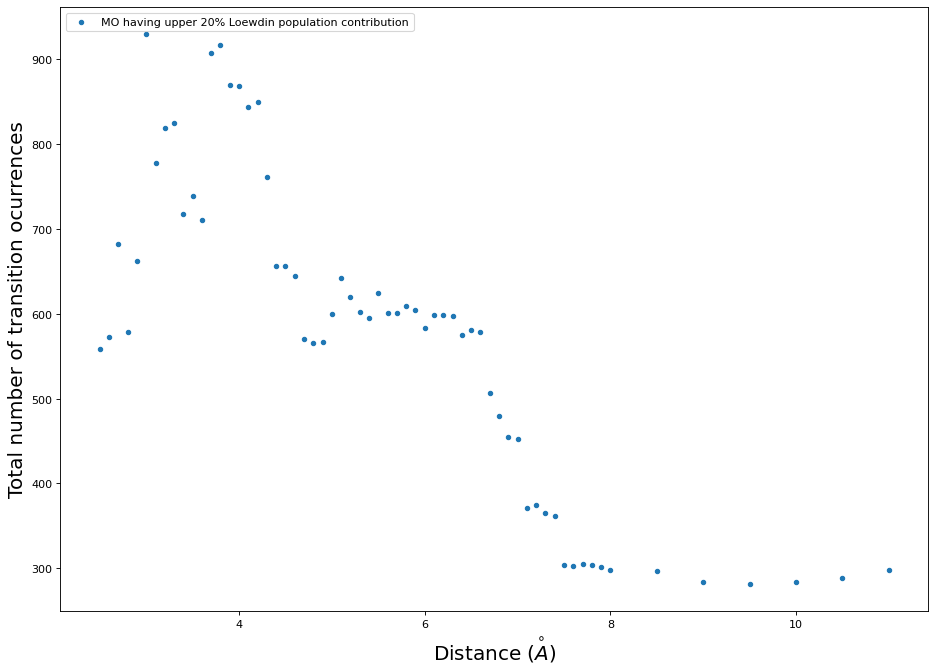

In [207]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, (np.array(ts_pop_sum)+np.array(ts_pop_sum_2)), s=15, label='MO having upper 20% Loewdin population contribution')
#label='MO having upper 67% Loewdin population contribution'

plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total number of transition ocurrences')
plt.legend(loc='upper left');
plt.show()

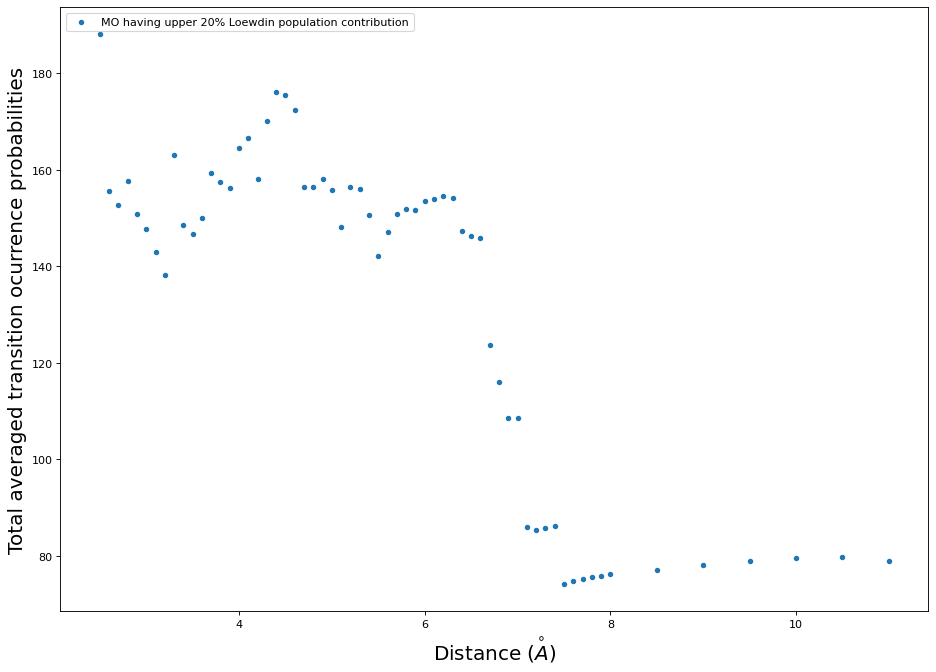

In [208]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, (np.array(tspb_pop_sum)+np.array(tspb_pop_sum_2)), s=15, label='MO having upper 20% Loewdin population contribution')
#label='MO having upper 67% Loewdin population contribution'

plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total averaged transition ocurrence probabilities')
plt.legend(loc='upper left');
plt.show()

#### by WSM

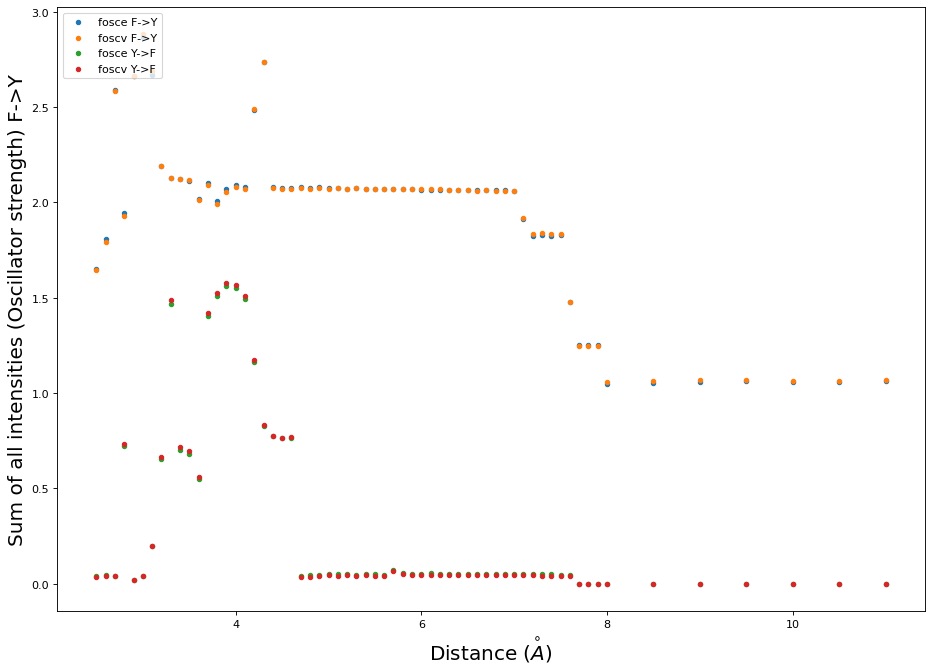

In [209]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, fosce_all_sum, s=15, label='fosce F->Y')
n1.scatter(AB_distances, foscv_all_sum, s=15, label='foscv F->Y')
n1.scatter(AB_distances, fosce_all_sum_2, s=15, label='fosce Y->F')
n1.scatter(AB_distances, foscv_all_sum_2, s=15, label='foscv Y->F')

#label=str(ii/10)+'$\overset{\circ}{A}$'
plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Sum of all intensities (Oscillator strength) F->Y')
plt.legend(loc='upper left');
plt.show()

In [210]:
np.array(fosce_all_sum)+np.array(fosce_all_sum_2)

array([1.68960851, 1.84845576, 2.63016006, 2.66813957, 2.68049404,
       2.90689998, 2.86471715, 2.84299121, 3.59146526, 2.8227071 ,
       2.79673059, 2.56758085, 3.50834217, 3.51703188, 3.63226477,
       3.64048489, 3.57306996, 3.64362781, 3.56064304, 2.8529183 ,
       2.83859478, 2.8372845 , 2.12109739, 2.11664563, 2.12407063,
       2.12588595, 2.12483376, 2.12144103, 2.12230401, 2.12371272,
       2.11928747, 2.11906328, 2.14226292, 2.1243445 , 2.11755667,
       2.11587555, 2.11890102, 2.1158343 , 2.11491743, 2.113626  ,
       2.11338747, 2.11240257, 2.11412013, 2.11309239, 2.1127201 ,
       2.10924062, 1.95994261, 1.87387293, 1.87559676, 1.87382677,
       1.87210517, 1.5195256 , 1.25399725, 1.25357562, 1.25272236,
       1.04913993, 1.05394522, 1.06018163, 1.06035047, 1.0597052 ,
       1.0579938 , 1.06126061])

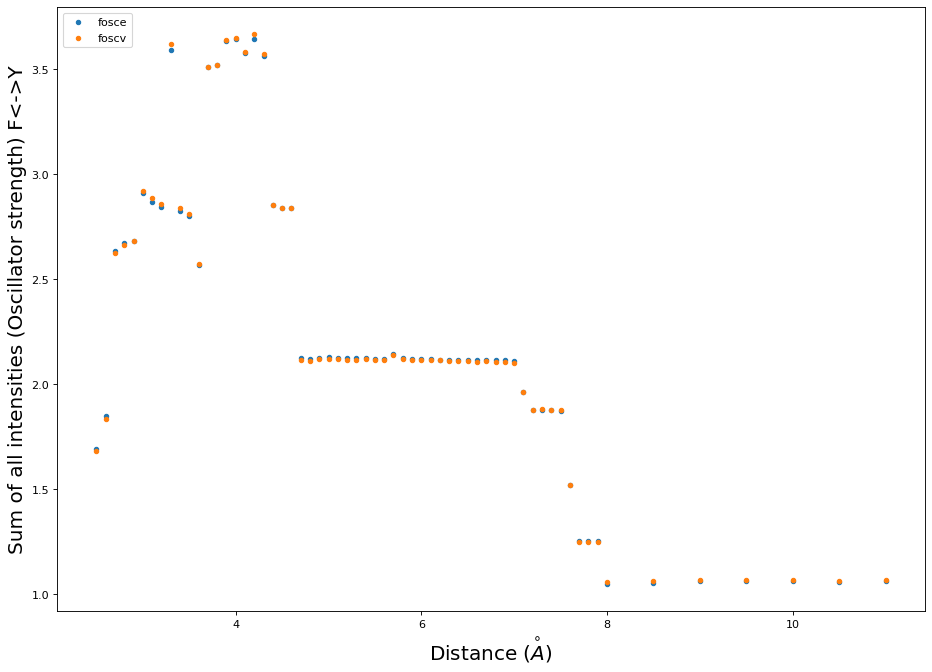

In [211]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, (np.array(fosce_all_sum)+np.array(fosce_all_sum_2)), s=15, label='fosce')
n1.scatter(AB_distances, (np.array(foscv_all_sum)+np.array(foscv_all_sum_2)), s=15, label='foscv')

#label=str(ii/10)+'$\overset{\circ}{A}$'
plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Sum of all intensities (Oscillator strength) F<->Y')
plt.legend(loc='upper left');
plt.show()

#### by WAM

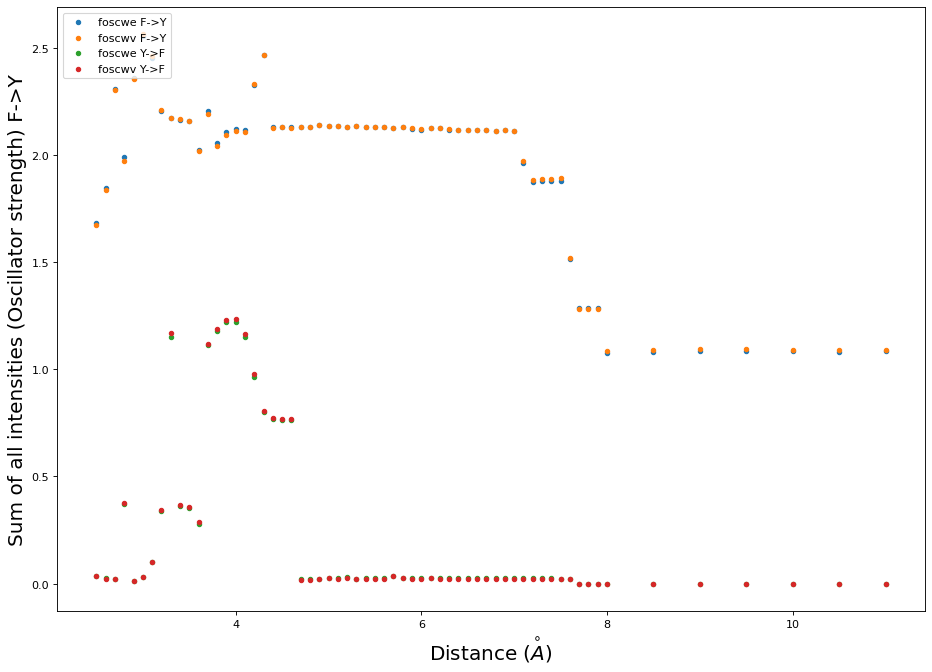

In [212]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, foscwe_all_sum, s=15, label='foscwe F->Y')
n1.scatter(AB_distances, foscwv_all_sum, s=15, label='foscwv F->Y')
n1.scatter(AB_distances, foscwe_all_sum_2, s=15, label='foscwe Y->F')
n1.scatter(AB_distances, foscwv_all_sum_2, s=15, label='foscwv Y->F')

#label=str(ii/10)+'$\overset{\circ}{A}$'
plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Sum of all intensities (Oscillator strength) F->Y')
plt.legend(loc='upper left');
plt.show()

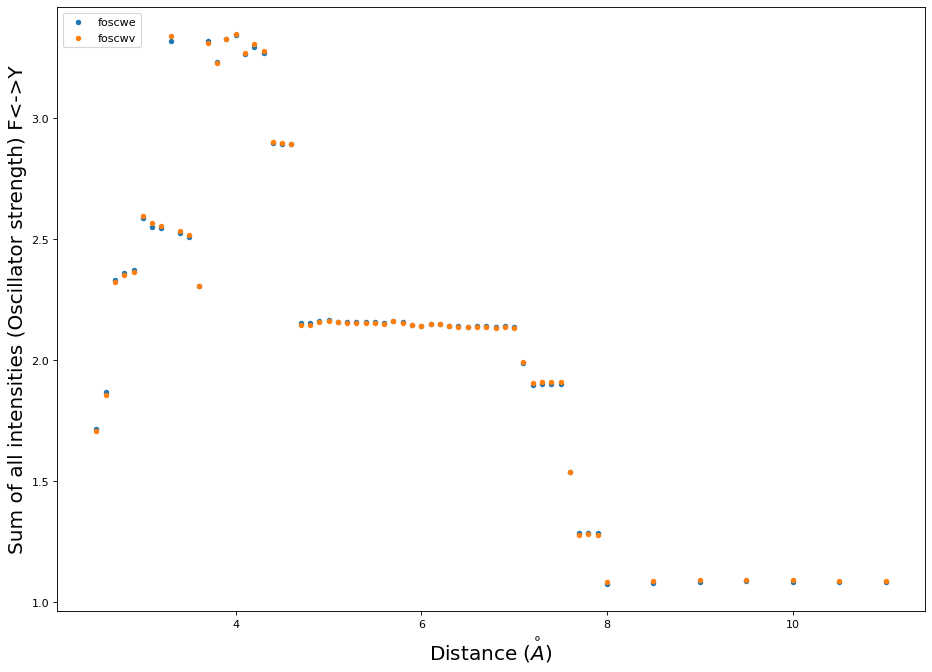

In [213]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, (np.array(foscwe_all_sum)+np.array(foscwe_all_sum_2)), s=15, label='foscwe')
n1.scatter(AB_distances, (np.array(foscwv_all_sum)+np.array(foscwv_all_sum_2)), s=15, label='foscwv')

#label=str(ii/10)+'$\overset{\circ}{A}$'
plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Sum of all intensities (Oscillator strength) F<->Y')
plt.legend(loc='upper left');
plt.show()

___________________________________________________

## FMO data from FMODB and GAMESS

In [214]:
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 24

### Those features correspond to the properties that they calculated using FMO2/MP2/6-31G(d)

In [215]:
### Header FMO one-body properties

In [216]:
file="FY_PIEDA/"
preff="1body_fmo_1_AB_"
post="A_fmo_mp2.csv"
#list_suf = [26, 27, 28, 29, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
l_tmp = [85, 90, 95, 100, 105, 110]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)

for ii in list_suf:
    globals()['dt_FMO1_1_%s' % str(ii)] = pd.read_csv(file+preff+str(ii/10)+post, delimiter=',', header=None)
    globals()['dt_FMO1_1_%s' % str(ii)].columns = ["Frag.#","AA","Res.#","Layer","E''corr","E''uncorr","DX","DY","DZ"]
dt_FMO1_1_31.head()

,Frag.#,AA,Res.#,Layer,E''corr,E''uncorr,DX,DY,DZ
0,1,FRAG1,NaN,L1,-553.385299,-551.529437,2.32017,-1.38275,0.96973
1,2,FRAG2,NaN,L1,-628.466888,-626.410880,-0.42616,-1.17781,-0.34021


Fragment number (Frag.#)\
AA (amino acid)\
Residue number (Res.#)\
Layer level of FMO calculation (Layer)

### Header FMO two-body properties

In [231]:
file="FY_PIEDA/"
preff="2body_fmo_1_AB_"
post="A_fmo_mp2.csv"
#list_suf = [26, 27, 28, 29, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

for ii in list_suf:
    globals()['dt_FMO2_1_%s' % str(ii)] = pd.read_csv(file+preff+str(ii/10)+post, delimiter=',')
dt_FMO2_1_25.head()

,I,J,DL,Z,R,Q(I->J),EIJ-EI-EJ,dDIJ*VIJ,total,Ees,Eex,Ect+mix,Erc+di,Gsol
0,2,1,C1,0,0.46,-0.0094,45.087,0.0,45.087,-194.859,384.682,-70.474,-74.262,0.0


DL: D=C dynamically correlated (MP2,CI), D=N not dynamically correlated\
(RHF,DFT). D=S separated dimer: semiclassical interaction (ES), D=M MCSCF.\
L: Layer level\
Z: Monomer charge product\
R: Interfragment distance relative to van-der-Waals radii\
   (-1.00 is printed if distances are not computed).\
dDIJ*VIJ: Explicit embedded charge transfer energy.\
Q(I->J): Charge transfer amount, printed as zero if not available.\
Positive values correspond to I in IJ having extra negative charge.\
total = (EIJ-EI-EJ)+dDIJ*VIJ+Gsol = Ees+Eex+Ect+mix+Edisp+Gsol (kcal/mol).

### F$---$Y ( $n=2.5, 3.0, ..., 11.0 \overset{\circ}{A}$  )
#### FMO-PIEDA/MP2-6-311** 

##### Combining data from FMO1_1, FMO2_1 and FMO2_2

In [218]:
def get_one_feat_info(df, feature, num_feat):
    """
    it returns information from a specific feature number where feature
    can be a fragment or residue in the FMO one-body properties.
    num_feat has to be a non-string value
    """
    return df.loc[df[feature] == num_feat]

In [219]:
def get_aa_info(df, aa):
    """
    it returns information having the same amino acid name in the FMO one-body properties
    """
    return df[df['AA'].str.match(aa)]

In [220]:
def get_one_frag_feat_info(df_1, df_2, feature='I', num_res=1):
    """
    it returns information from a specific fragment feature and residue number.
    Where fragment feature could be I-th of J-th fragment and residue number
    corresponds to the specific amino acid to obtain the FMO two-body properties.
    df_1 is a data frame having FMO one-body properties.
    df_2 is a data frame having FMO two-body properties.
    feature is I or J.
    num_res has to be an integer value.
    """
    frag_num = get_one_feat_info(df_1, 'Res.#', num_res)['Frag.#'].iloc[0]
    return get_one_feat_info(df_2, feature, frag_num)

In [221]:
def get_one_res_feat_info(df_1, df_2, feature='I', num_frag=1):
    """
    it returns information from a specific fragment feature and number.
    Where fragment feature could be I-th of J-th fragment and fragment number
    corresponds to the specific fragment from Facio to obtain the FMO two-body properties.
    df_1 is a data frame having FMO one-body properties.
    df_2 is a data frame having FMO two-body properties.
    feature is I or J.
    num_frag has to be an integer value.
    """
    frag_res = get_one_feat_info(df_1, 'Frag.#', num_frag)['Res.#'].iloc[0]
    return get_one_feat_info(df_2, feature, frag_res)

In [222]:
def sorting_info(df, by_value):
    """
    it returns information sorted by the by_value parameter
    """
    return df.sort_values(by=[by_value])

Getting informaton from a known residue number

In [223]:
get_one_feat_info(dt_FMO1_1_30, 'Res.#', 1) #res is NaN. to correct

,Frag.#,AA,Res.#,Layer,E''corr,E''uncorr,DX,DY,DZ


Getting informaton from a known fragment number

In [224]:
get_one_feat_info(dt_FMO1_1_30, 'Frag.#', 1)

,Frag.#,AA,Res.#,Layer,E''corr,E''uncorr,DX,DY,DZ
0,1,FRAG1,NaN,L1,-553.384319,-551.528715,2.32167,-1.36046,1.07865


Getting informaton from a specific amino acid

In [225]:
get_aa_info(dt_FMO1_1_30, 'FRAG1')

,Frag.#,AA,Res.#,Layer,E''corr,E''uncorr,DX,DY,DZ
0,1,FRAG1,NaN,L1,-553.384319,-551.528715,2.32167,-1.36046,1.07865


In [226]:
def plot_alot_xray(global_name, list_suf, x_arg, y_arg, xlmt=False, xmin=288, xmax=310, label=None, \
              scalec=False, ref_list=list_suf, plotsvg=False, nameplt='figure.svg',\
              figsize=(16, 10), dpi=80, linestyle='-', marker='o', linewidth=1.3, markersize=1.3):
    """
    Function to plot a customize X-ray spectra (on development)
    global_name is the list of names for the different pd data frame
    list_suf is a list that contains the differentiable part of the global_name
    x_arg and y_arg are the columns data to plot from pd data frame
    label is a list of labels for each plot
    
    Range of color fading away can be change by changing boleean value in scalec
    and setting ref_list with a list that contains the differentiable part of the
    global_name. if list_suf and ref_list are different, scale of color will be different
    (on revision)
    
    To define a new xrange to plot, it is convenient just to load specific ranges
    from the dataframe in global_name. Then, change xlmt to True and set the values
    as minimun (xmin) and maximum (xmax) in the x-axis of the plot.
    """
    
    #defining scale of colors to use in  the cmap selected
    if scalec:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(ref_list)))
    else:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(list_suf)))
    if label==None:
        label=[]
        label=['_nolegend_' for ii in list_suf]

    fig = plt.figure(figsize=figsize, dpi=dpi)
    n1 = fig.add_subplot(111)
    cc=0
    if xlmt:
        for ii in list_suf:#using xmin and xmax as new range to plot data frames
            n1.plot(x_arg, y_arg, data=newxrange(global_name[cc], x_arg, xmin, xmax), \
                    linestyle=linestyle, marker=marker, linewidth=linewidth, \
                    markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
    else:
        for ii in list_suf:
            n1.plot(x_arg, y_arg, data=global_name[cc], linestyle=linestyle, marker=marker, \
                    linewidth=linewidth, markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1

    cmap = plt.get_cmap("coolwarm", len(list_suf))
    norm= matplotlib.colors.BoundaryNorm(np.linspace(0.05, 0.85, len(list_suf)),len(list_suf))
    #np.arange(0,len(list_suf)+1)-0.5, len(list_suf))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ticks=np.arange(0,len(list_suf)))#np.array(list_suf)/10)#ticks=np.arange(0,len(list_suf),2))

    plt.xlabel('Energy (eV)')
    plt.ylabel('Intensity (Oscillator strength)')
    #plt.legend(loc='upper left');
    plt.show()
    if plotsvg:
        fig.savefig(nameplt, format="svg")
    

In [227]:
def newxrange(data, col, minl, maxl):
    """
    this function crops a pd data frame
    """
    return data.loc[(data[col]>=minl) & (data[col]<=maxl)]

In [91]:
def getting_max_int(df, min_r, max_r):
    """
    giving a specific range of the data, this function returns the energy when intensity is maximum
    """
    num = df[(df['Energy']<max_r) & (df['Energy']>min_r)]['Intensity'].idxmax()
    try:
        return df.iloc[num][['Energy','Intensity']]
    except IndexError:
        return pd.DataFrame({'Energy': [NaN], 'Intensity': [NaN]})
        

_______________________

### Visualization

In [232]:
l_tmp = [85, 90, 95, 100, 105, 110]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)

In [234]:
feat_1 = [ii/10 for ii in list_suf]
feat_2 = [globals()['dt_FMO2_1_%s' % str(ii)][['EIJ-EI-EJ']].iloc[0][0] for ii in list_suf]
feat_3 = [globals()['dt_FMO2_1_%s' % str(ii)][['total']].iloc[0][0] for ii in list_suf]
feat_4 = [globals()['dt_FMO2_1_%s' % str(ii)][['Ees']].iloc[0][0] for ii in list_suf]
feat_5 = [globals()['dt_FMO2_1_%s' % str(ii)][['Eex']].iloc[0][0] for ii in list_suf]
feat_6 = [globals()['dt_FMO2_1_%s' % str(ii)][['Ect+mix']].iloc[0][0] for ii in list_suf]
feat_7 = [globals()['dt_FMO2_1_%s' % str(ii)][['Erc+di']].iloc[0][0] for ii in list_suf]

In [235]:
data_fmo2 = {'Distance': feat_1, 'EIJ-EI-EJ': feat_2, 'total': feat_3, 'Ees': feat_4,
             'Eex': feat_5, 'Ect+mix': feat_6, 'Erc+di': feat_7}
eda_fy = pd.DataFrame(data_fmo2)

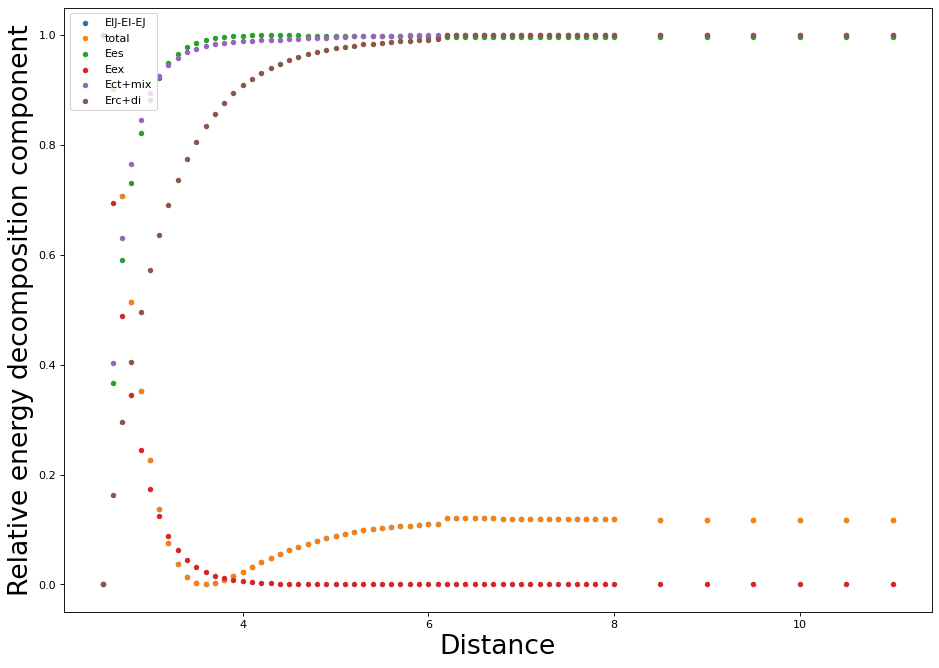

In [236]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(eda_fy[['Distance']], (eda_fy[['EIJ-EI-EJ']]-eda_fy[['EIJ-EI-EJ']].min())/(eda_fy[['EIJ-EI-EJ']].max()-eda_fy[['EIJ-EI-EJ']].min()), s=15, label='EIJ-EI-EJ')
n1.scatter(eda_fy[['Distance']], (eda_fy[['total']]-eda_fy[['total']].min())/(eda_fy[['total']].max()-eda_fy[['total']].min()), s=15, label='total')
n1.scatter(eda_fy[['Distance']], (eda_fy[['Ees']]-eda_fy[['Ees']].min())/(eda_fy[['Ees']].max()-eda_fy[['Ees']].min()), s=15, label='Ees')
n1.scatter(eda_fy[['Distance']], (eda_fy[['Eex']]-eda_fy[['Eex']].min())/(eda_fy[['Eex']].max()-eda_fy[['Eex']].min()), s=15, label='Eex')
n1.scatter(eda_fy[['Distance']], (eda_fy[['Ect+mix']]-eda_fy[['Ect+mix']].min())/(eda_fy[['Ect+mix']].max()-eda_fy[['Ect+mix']].min()), s=15, label='Ect+mix')
n1.scatter(eda_fy[['Distance']], (eda_fy[['Erc+di']]-eda_fy[['Erc+di']].min())/(eda_fy[['Erc+di']].max()-eda_fy[['Erc+di']].min()), s=15, label='Erc+di')
    
plt.xlabel('Distance')
plt.ylabel('Relative energy decomposition component')
plt.legend(loc='upper left');
#plt.ylim([-1.3,5.8])
#n1.plot(dates, values, '-o')
plt.show()

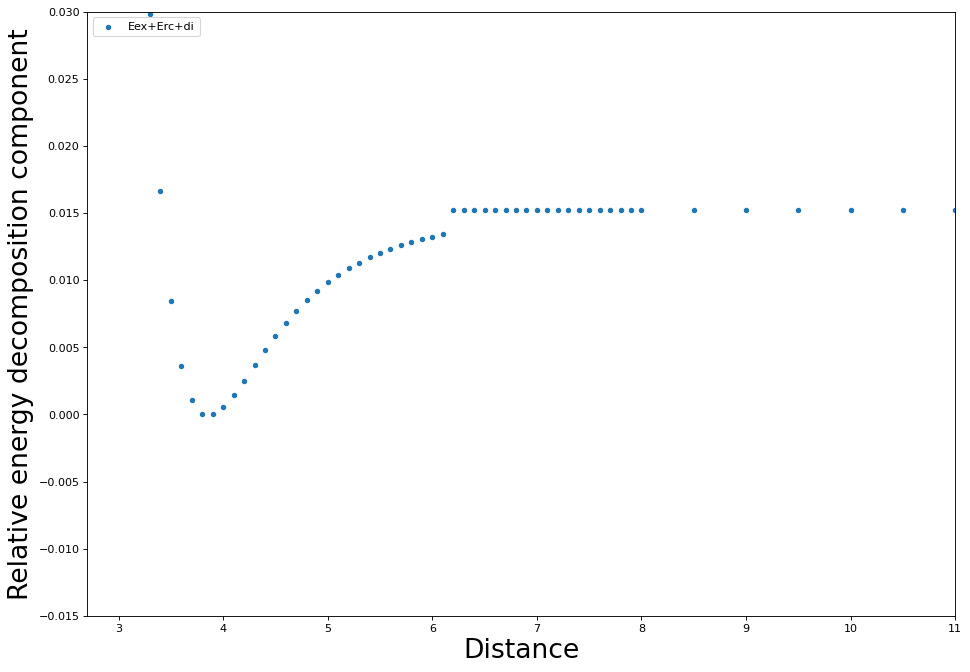

In [237]:
mx=(eda_fy['Erc+di']+ eda_fy['Eex']).max()
mn=(eda_fy['Erc+di']+ eda_fy['Eex']).min()
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#n1.scatter(eda_fy[['Distance']], (eda_fy[['EIJ-EI-EJ']]-eda_fy[['EIJ-EI-EJ']].min())/(eda_fy[['EIJ-EI-EJ']].max()-eda_fy[['EIJ-EI-EJ']].min()), s=15, label='EIJ-EI-EJ')
#n1.scatter(eda_fy[['Distance']], (eda_fy[['Eex']]-eda_fy[['Eex']].min())/(eda_fy[['Eex']].max()-eda_fy[['Eex']].min()), s=15, label='Eex')
#n1.scatter(eda_fy[['Distance']], (eda_fy[['Ect+mix']]-eda_fy[['Ect+mix']].min())/(eda_fy[['Ect+mix']].max()-eda_fy[['Ect+mix']].min()), s=15, label='Ect+mix')
#n1.scatter(eda_fy[['Distance']], (eda_fy[['Erc+di']]-eda_fy[['Erc+di']].min())/(eda_fy[['Erc+di']].max()-eda_fy[['Erc+di']].min()), s=15, label='Erc+di')
#n1.scatter(eda_fy[['Distance']], eda_fy[['Eex']] , s=15, label='Eex+Erc+di')
#n1.scatter(eda_fy[['Distance']], eda_fy[['Erc+di']], s=15, label='Eex+Erc+di')
#n1.scatter(eda_fy[['Distance']], eda_fy['Eex']+eda_fy['Erc+di'], s=15, label='Eex+Erc+di')
n1.scatter(eda_fy[['Distance']], ((eda_fy['Eex']+eda_fy['Erc+di'])-mn)/(mx-mn), s=15, label='Eex+Erc+di')
#n1.scatter(eda_fy[['Distance']], (eda_fy[['Ect+mix']]-eda_fy[['Ect+mix']].min())/(eda_fy[['Ect+mix']].max()-eda_fy[['Ect+mix']].min()), s=15, label='Ect+mix')
    
plt.xlabel('Distance')
plt.ylabel('Relative energy decomposition component')
plt.legend(loc='upper left');
plt.xlim([2.7,11])
plt.ylim([-0.015,0.03])
#n1.plot(dates, values, '-o')
plt.show()

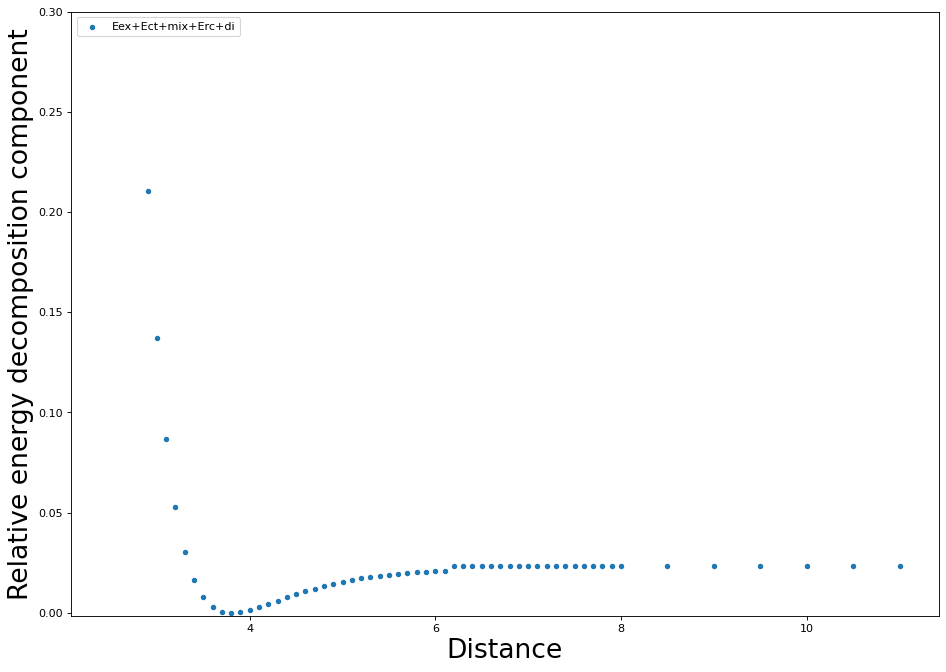

In [238]:
mx=(eda_fy['Ect+mix']+ eda_fy['Eex']+eda_fy['Erc+di']).max()
mn=(eda_fy['Ect+mix']+ eda_fy['Eex']+eda_fy['Erc+di']).min()
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#n1.scatter(eda_fy[['Distance']], (eda_fy[['EIJ-EI-EJ']]-eda_fy[['EIJ-EI-EJ']].min())/(eda_fy[['EIJ-EI-EJ']].max()-eda_fy[['EIJ-EI-EJ']].min()), s=15, label='EIJ-EI-EJ')
#n1.scatter(eda_fy[['Distance']], (eda_fy[['Eex']]-eda_fy[['Eex']].min())/(eda_fy[['Eex']].max()-eda_fy[['Eex']].min()), s=15, label='Eex')
#n1.scatter(eda_fy[['Distance']], (eda_fy[['Ect+mix']]-eda_fy[['Ect+mix']].min())/(eda_fy[['Ect+mix']].max()-eda_fy[['Ect+mix']].min()), s=15, label='Ect+mix')
#n1.scatter(eda_fy[['Distance']], (eda_fy[['Erc+di']]-eda_fy[['Erc+di']].min())/(eda_fy[['Erc+di']].max()-eda_fy[['Erc+di']].min()), s=15, label='Erc+di')
#n1.scatter(eda_fy[['Distance']], eda_fy[['Eex']] , s=15, label='Eex+Erc+di')
#n1.scatter(eda_fy[['Distance']], eda_fy[['Erc+di']], s=15, label='Eex+Erc+di')
#n1.scatter(eda_fy[['Distance']], eda_fy['Eex']+eda_fy['Erc+di'], s=15, label='Eex+Erc+di')
n1.scatter(eda_fy[['Distance']], ((eda_fy['Eex']+eda_fy['Ect+mix']+eda_fy['Erc+di'])-mn)/(mx-mn), s=15, label='Eex+Ect+mix+Erc+di')
#n1.scatter(eda_fy[['Distance']], (eda_fy[['Ect+mix']]-eda_fy[['Ect+mix']].min())/(eda_fy[['Ect+mix']].max()-eda_fy[['Ect+mix']].min()), s=15, label='Ect+mix')
    
plt.xlabel('Distance')
plt.ylabel('Relative energy decomposition component')
plt.legend(loc='upper left');
#plt.xlim([2.5,9])
plt.ylim([-0.0015,0.3])
#n1.plot(dates, values, '-o')
plt.show()

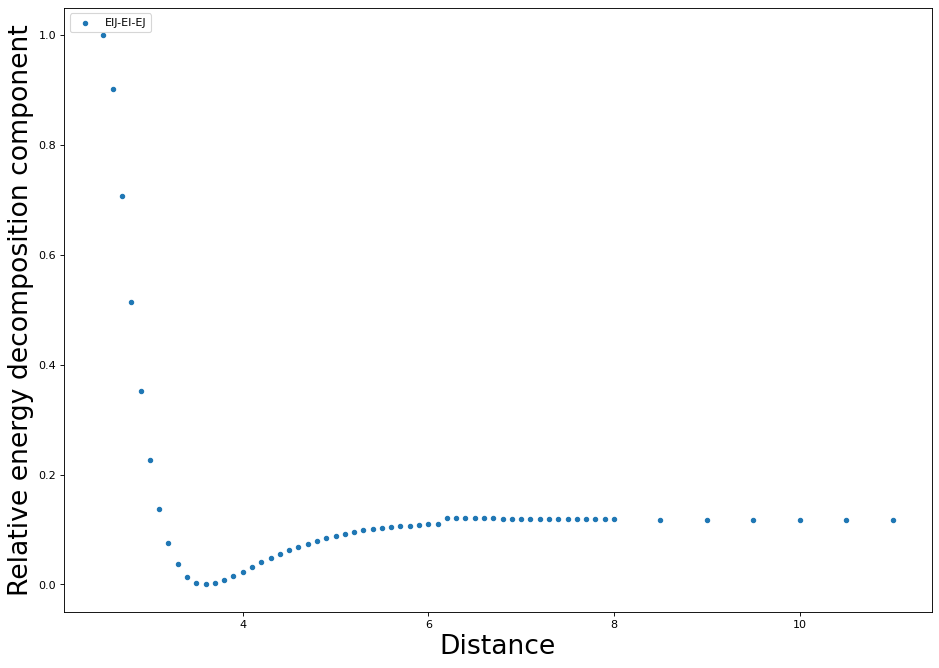

In [239]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

n1.scatter(eda_fy[['Distance']], (eda_fy[['EIJ-EI-EJ']]-eda_fy[['EIJ-EI-EJ']].min())/(eda_fy[['EIJ-EI-EJ']].max()-eda_fy[['EIJ-EI-EJ']].min()), s=15, label='EIJ-EI-EJ')
   
plt.xlabel('Distance')
plt.ylabel('Relative energy decomposition component')
plt.legend(loc='upper left');
#plt.xlim([2.5,9])
#plt.ylim([-0.0015,0.3])
#n1.plot(dates, values, '-o')
plt.show()

# PIEDAvs.XRay

In [62]:
l_tmp = [85]#, 90, 95, 100, 105, 110]
list_suf = [i for i in range(30,81)]
for i in l_tmp:
    list_suf.append(i)

In [63]:
feat_1 = [ii/10 for ii in list_suf]
feat_2 = [globals()['dt_FMO2_1_%s' % str(ii)][['EIJ-EI-EJ']].iloc[0][0] for ii in list_suf]
feat_3 = [globals()['dt_FMO2_1_%s' % str(ii)][['total']].iloc[0][0] for ii in list_suf]
feat_4 = [globals()['dt_FMO2_1_%s' % str(ii)][['Ees']].iloc[0][0] for ii in list_suf]
feat_5 = [globals()['dt_FMO2_1_%s' % str(ii)][['Eex']].iloc[0][0] for ii in list_suf]
feat_6 = [globals()['dt_FMO2_1_%s' % str(ii)][['Ect+mix']].iloc[0][0] for ii in list_suf]
feat_7 = [globals()['dt_FMO2_1_%s' % str(ii)][['Erc+di']].iloc[0][0] for ii in list_suf]

In [64]:
data_fmo2 = {'Distance': feat_1, 'EIJ-EI-EJ': feat_2, 'total': feat_3, 'Ees': feat_4,
             'Eex': feat_5, 'Ect+mix': feat_6, 'Erc+di': feat_7}
eda_fy = pd.DataFrame(data_fmo2)

In [240]:
AB_distances = [ii/10 for ii in list_suf]
ts_pop_sum = [globals()['core_virt_mo_%s_FY_pop' % str(ii)].sum().sum() for ii in list_suf]
tspb_pop_sum = [globals()['corevirtMO_matrix_tspb_%s_FY_pop' % str(ii)].sum().sum() for ii in list_suf]
fosce_all_sum = [globals()['corevirt_mo_fosce_%s_FY' % str(ii)].sum().sum() for ii in list_suf]
foscv_all_sum = [globals()['corevirt_mo_foscv_%s_FY' % str(ii)].sum().sum() for ii in list_suf]
foscwe_all_sum = [globals()['corevirt_mo_foscwe_%s_FY' % str(ii)].sum().sum() for ii in list_suf]
foscwv_all_sum = [globals()['corevirt_mo_foscwv_%s_FY' % str(ii)].sum().sum() for ii in list_suf]
ts_pop_sum_2 = [globals()['core_virt_mo_%s_YF_pop' % str(ii)].sum().sum() for ii in list_suf]
tspb_pop_sum_2 = [globals()['corevirtMO_matrix_tspb_%s_YF_pop' % str(ii)].sum().sum() for ii in list_suf]
fosce_all_sum_2 = [globals()['corevirt_mo_fosce_%s_YF' % str(ii)].sum().sum() for ii in list_suf]
foscv_all_sum_2 = [globals()['corevirt_mo_foscv_%s_YF' % str(ii)].sum().sum() for ii in list_suf]
foscwe_all_sum_2 = [globals()['corevirt_mo_foscwe_%s_YF' % str(ii)].sum().sum() for ii in list_suf]
foscwv_all_sum_2 = [globals()['corevirt_mo_foscwv_%s_YF' % str(ii)].sum().sum() for ii in list_suf]

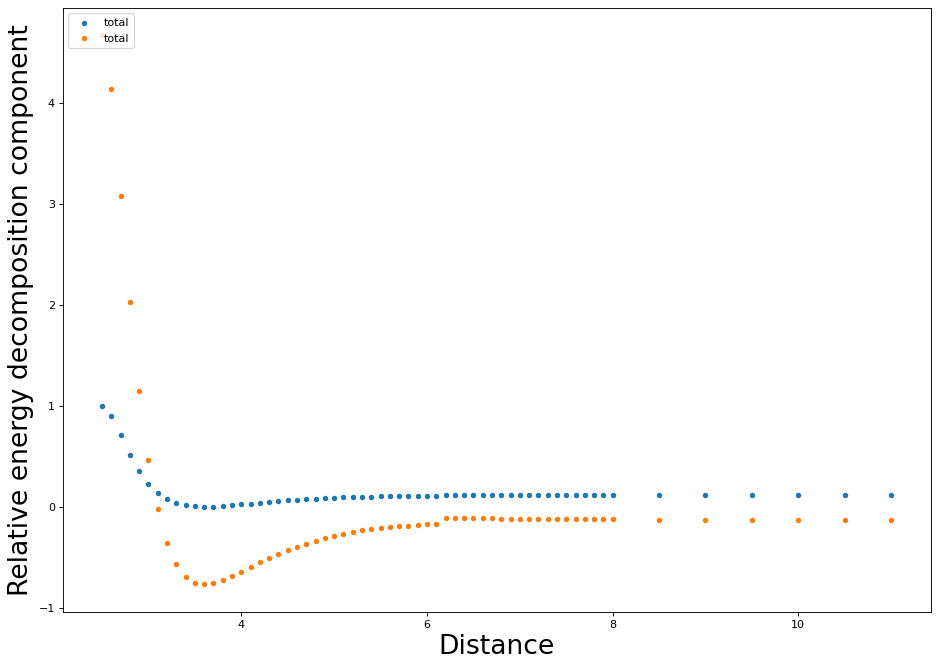

In [242]:
mx_fmo=(eda_fy['total']).max()
mn_fmo=(eda_fy['total']).min()
mean_fmo=(eda_fy['total']).mean()
std_fmo=(eda_fy['total']).std()

mx_ct=(eda_fy['Ect+mix']).max()
mn_ct=(eda_fy['Ect+mix']).min()
mean_ct=(eda_fy['Ect+mix']).mean()
std_ct=(eda_fy['Ect+mix']).std()

#mx_fmo=(eda_fy['Erc+di']+ eda_fy['Eex']).max()
#mn_fmo=(eda_fy['Erc+di']+ eda_fy['Eex']).min()
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#n1.scatter(eda_fy[['Distance']], (eda_fy[['EIJ-EI-EJ']]-eda_fy[['EIJ-EI-EJ']].min())/(eda_fy[['EIJ-EI-EJ']].max()-eda_fy[['EIJ-EI-EJ']].min()), s=15, label='EIJ-EI-EJ')
#n1.scatter(eda_fy[['Distance']], (eda_fy[['Eex']]-eda_fy[['Eex']].min())/(eda_fy[['Eex']].max()-eda_fy[['Eex']].min()), s=15, label='Eex')
#n1.scatter(eda_fy[['Distance']], (eda_fy[['Ect+mix']]-eda_fy[['Ect+mix']].min())/(eda_fy[['Ect+mix']].max()-eda_fy[['Ect+mix']].min()), s=15, label='Ect+mix')
#n1.scatter(eda_fy[['Distance']], (eda_fy[['Erc+di']]-eda_fy[['Erc+di']].min())/(eda_fy[['Erc+di']].max()-eda_fy[['Erc+di']].min()), s=15, label='Erc+di')
#n1.scatter(eda_fy[['Distance']], eda_fy[['Eex']] , s=15, label='Eex+Erc+di')
#n1.scatter(eda_fy[['Distance']], eda_fy[['Erc+di']], s=15, label='Eex+Erc+di')
#n1.scatter(eda_fy[['Distance']], eda_fy['Eex']+eda_fy['Erc+di'], s=15, label='Eex+Erc+di')
n1.scatter(eda_fy[['Distance']], ((eda_fy['total'])-mn_fmo)/(mx_fmo-mn_fmo), s=15, label='total')
n1.scatter(eda_fy[['Distance']], ((eda_fy['total'])-mean_fmo)/(std_fmo), s=15, label='total')
#n1.scatter(eda_fy[['Distance']], (eda_fy[['Ect+mix']]-eda_fy[['Ect+mix']].min())/(eda_fy[['Ect+mix']].max()-eda_fy[['Ect+mix']].min()), s=15, label='Ect+mix')
    
plt.xlabel('Distance')
plt.ylabel('Relative energy decomposition component')
plt.legend(loc='upper left');
#plt.xlim([2.7,11])
#plt.ylim([-0.015,0.03])
#n1.plot(dates, values, '-o')
plt.show()

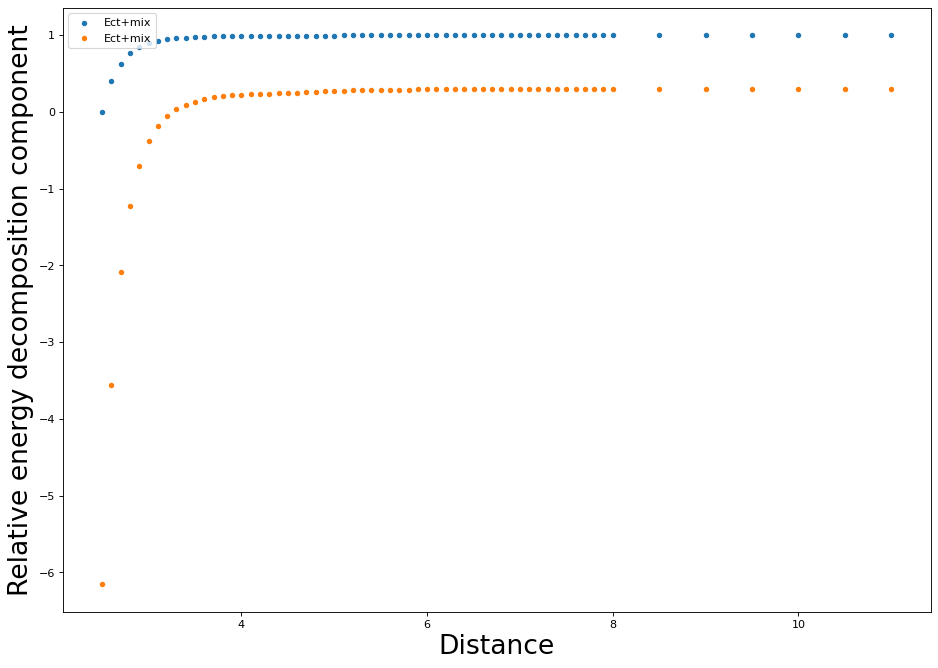

In [245]:
mx_fmo=(eda_fy['total']).max()
mn_fmo=(eda_fy['total']).min()
mean_fmo=(eda_fy['total']).mean()
std_fmo=(eda_fy['total']).std()

mx_ct=(eda_fy['Ect+mix']).max()
mn_ct=(eda_fy['Ect+mix']).min()
mean_ct=(eda_fy['Ect+mix']).mean()
std_ct=(eda_fy['Ect+mix']).std()

#mx_fmo=(eda_fy['Erc+di']+ eda_fy['Eex']).max()
#mn_fmo=(eda_fy['Erc+di']+ eda_fy['Eex']).min()
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

n1.scatter(eda_fy[['Distance']], ((eda_fy['Ect+mix'])-mn_ct)/(mx_ct-mn_ct), s=15, label='Ect+mix')
n1.scatter(eda_fy[['Distance']], ((eda_fy['Ect+mix'])-mean_ct)/(std_ct), s=15, label='Ect+mix')
#n1.scatter(eda_fy[['Distance']], (eda_fy[['Ect+mix']]-eda_fy[['Ect+mix']].min())/(eda_fy[['Ect+mix']].max()-eda_fy[['Ect+mix']].min()), s=15, label='Ect+mix')
    
plt.xlabel('Distance')
plt.ylabel('Relative energy decomposition component')
plt.legend(loc='upper left');
#plt.xlim([2.7,11])
#plt.ylim([-0.015,0.03])
#n1.plot(dates, values, '-o')
plt.show()

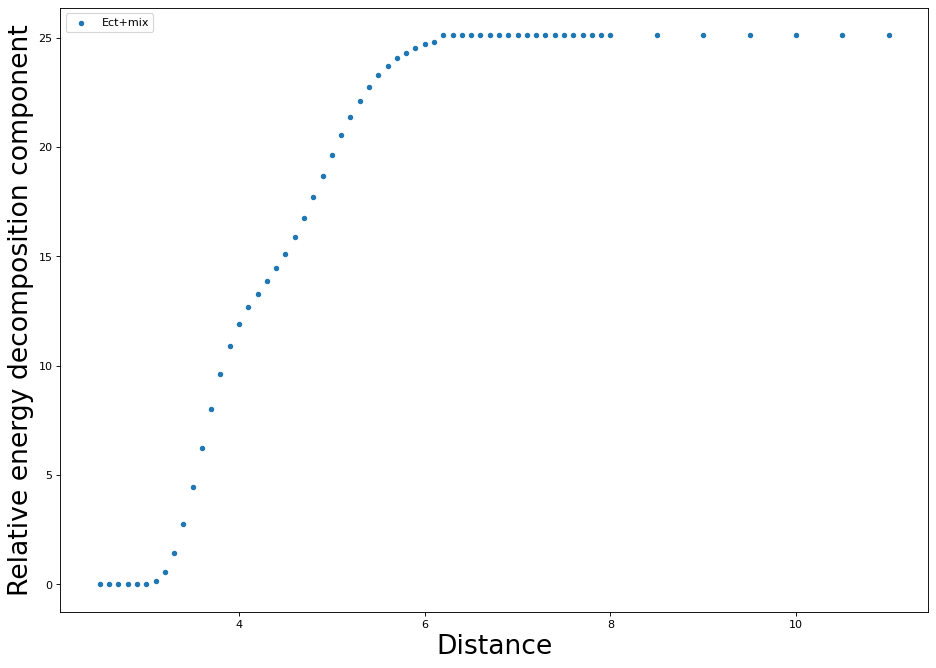

In [258]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#n1.scatter(eda_fy[['Distance']], np.exp((eda_fy['Ect+mix'])-mn_ct)/(mx_ct-mn_ct), s=15, label='Ect+mix')
#n1.scatter(eda_fy[['Distance']], np.exp((eda_fy['Ect+mix'])-mean_ct)/(std_ct), s=15, label='Ect+mix')
n1.scatter(eda_fy[['Distance']], np.exp((eda_fy['Ect+mix']-mean_ct)), s=15, label='Ect+mix')
#n1.scatter(eda_fy[['Distance']], (eda_fy[['Ect+mix']]-eda_fy[['Ect+mix']].min())/(eda_fy[['Ect+mix']].max()-eda_fy[['Ect+mix']].min()), s=15, label='Ect+mix')
    
plt.xlabel('Distance')
plt.ylabel('Relative energy decomposition component')
plt.legend(loc='upper left');
#plt.xlim([2.7,7])
#plt.ylim([-0.015,1.46])
#plt.ylim([1.25,1.38])
#n1.plot(dates, values, '-o')
plt.show()

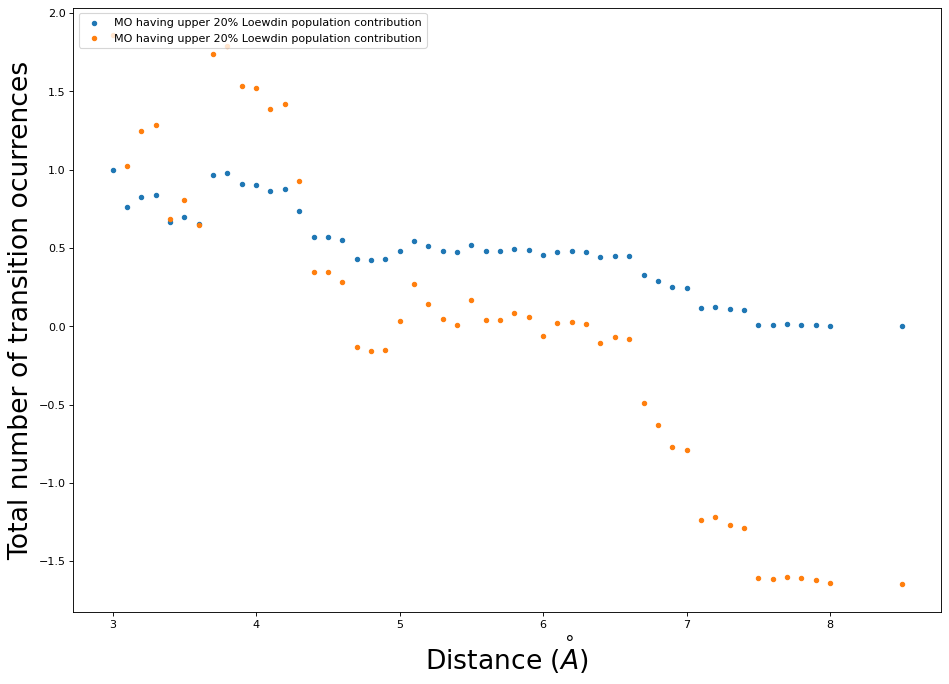

In [69]:
mx_xray=(np.array(ts_pop_sum)+np.array(ts_pop_sum_2)).max()
mn_xray=(np.array(ts_pop_sum)+np.array(ts_pop_sum_2)).min()
mean_xray=(np.array(ts_pop_sum)+np.array(ts_pop_sum_2)).mean()
std_xray=(np.array(ts_pop_sum)+np.array(ts_pop_sum_2)).std()

fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
#n1.scatter(((eda_fy['Eex']+eda_fy['Erc+di'])-mn)/(mx-mn), (np.array(ts_pop_sum)+np.array(ts_pop_sum_2)), s=15, label='MO having upper 20% Loewdin population contribution')
n1.scatter(AB_distances, ((np.array(ts_pop_sum)+np.array(ts_pop_sum_2)-mn_xray)/(mx_xray-mn_xray)), s=15, label='MO having upper 20% Loewdin population contribution')
n1.scatter(AB_distances, ((np.array(ts_pop_sum)+np.array(ts_pop_sum_2)-mean_xray)/std_xray), s=15, label='MO having upper 20% Loewdin population contribution')
#label='MO having upper 67% Loewdin population contribution'


plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total number of transition ocurrences')
plt.legend(loc='upper left');
plt.show()

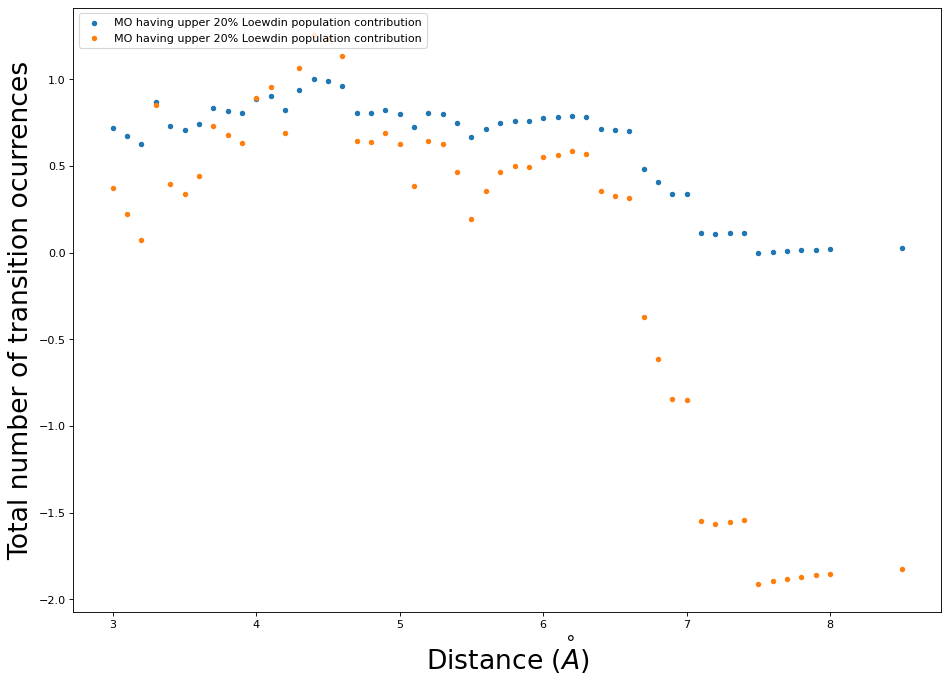

In [70]:
mx_xray_ts=(np.array(tspb_pop_sum)+np.array(tspb_pop_sum_2)).max()
mn_xray_ts=(np.array(tspb_pop_sum)+np.array(tspb_pop_sum_2)).min()
mean_xray_ts=(np.array(tspb_pop_sum)+np.array(tspb_pop_sum_2)).mean()
std_xray_ts=(np.array(tspb_pop_sum)+np.array(tspb_pop_sum_2)).std()

fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
#n1.scatter(((eda_fy['Eex']+eda_fy['Erc+di'])-mn)/(mx-mn), (np.array(ts_pop_sum)+np.array(ts_pop_sum_2)), s=15, label='MO having upper 20% Loewdin population contribution')
n1.scatter(AB_distances, ((np.array(tspb_pop_sum)+np.array(tspb_pop_sum_2)-mn_xray_ts)/(mx_xray_ts-mn_xray_ts)), s=15, label='MO having upper 20% Loewdin population contribution')
n1.scatter(AB_distances, ((np.array(tspb_pop_sum)+np.array(tspb_pop_sum_2)-mean_xray_ts)/std_xray_ts), s=15, label='MO having upper 20% Loewdin population contribution')
#label='MO having upper 67% Loewdin population contribution'


plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total number of transition ocurrences')
plt.legend(loc='upper left');
plt.show()

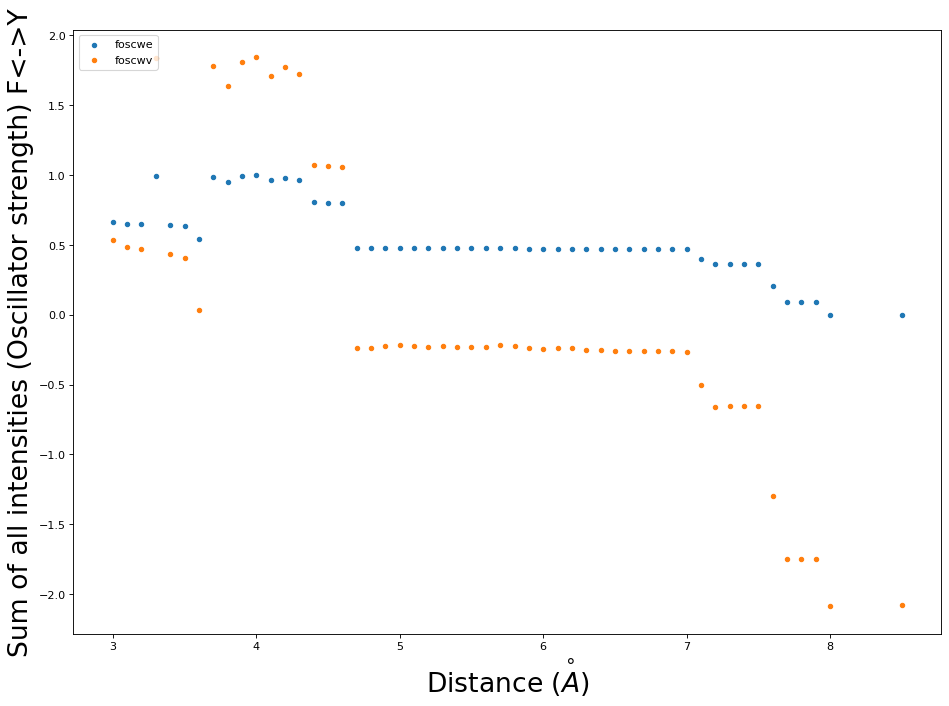

In [71]:
mn_xray_f = (np.array(foscwe_all_sum)+np.array(foscwe_all_sum_2)).min()
mx_xray_f = (np.array(foscwe_all_sum)+np.array(foscwe_all_sum_2)).max()
mean_xray_f = (np.array(foscwe_all_sum)+np.array(foscwe_all_sum_2)).mean()
std_xray_f = (np.array(foscwe_all_sum)+np.array(foscwe_all_sum_2)).std()

fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, ((np.array(foscwe_all_sum)+np.array(foscwe_all_sum_2))-mn_xray_f)/(mx_xray_f-mn_xray_f), s=15, label='foscwe')
n1.scatter(AB_distances, ((np.array(foscwv_all_sum)+np.array(foscwv_all_sum_2))-mean_xray_f)/std_xray_f, s=15, label='foscwv')

#label=str(ii/10)+'$\overset{\circ}{A}$'
plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Sum of all intensities (Oscillator strength) F<->Y')
plt.legend(loc='upper left');
plt.show()

In [72]:
tspb_pop_sum

[69.9862468,
 66.354218,
 66.094756,
 78.92294299999999,
 71.43692099999998,
 71.01956299999999,
 72.78011120000001,
 74.375033,
 72.91760000000001,
 72.444683,
 75.357125,
 75.742074,
 67.989825,
 77.00496700000001,
 81.71638100000001,
 80.395009,
 78.64835700000002,
 68.978259,
 68.88339,
 69.201841,
 68.68511,
 65.961391,
 69.01685699999999,
 69.499321,
 68.40465999999999,
 65.506805,
 67.315367,
 68.030238,
 68.068095,
 67.568984,
 68.551796,
 68.869281,
 69.84061100000001,
 69.503642,
 62.572075000000005,
 61.75952099999999,
 61.798276,
 56.11063,
 56.10108400000001,
 56.07514,
 56.093863999999996,
 41.629727,
 41.001937999999996,
 41.09439999999999,
 41.091010999999995,
 35.310784000000005,
 35.404968,
 35.519413,
 35.658585,
 35.80393,
 35.92891900000001,
 36.274378]

In [73]:
import matplotlib as mpl

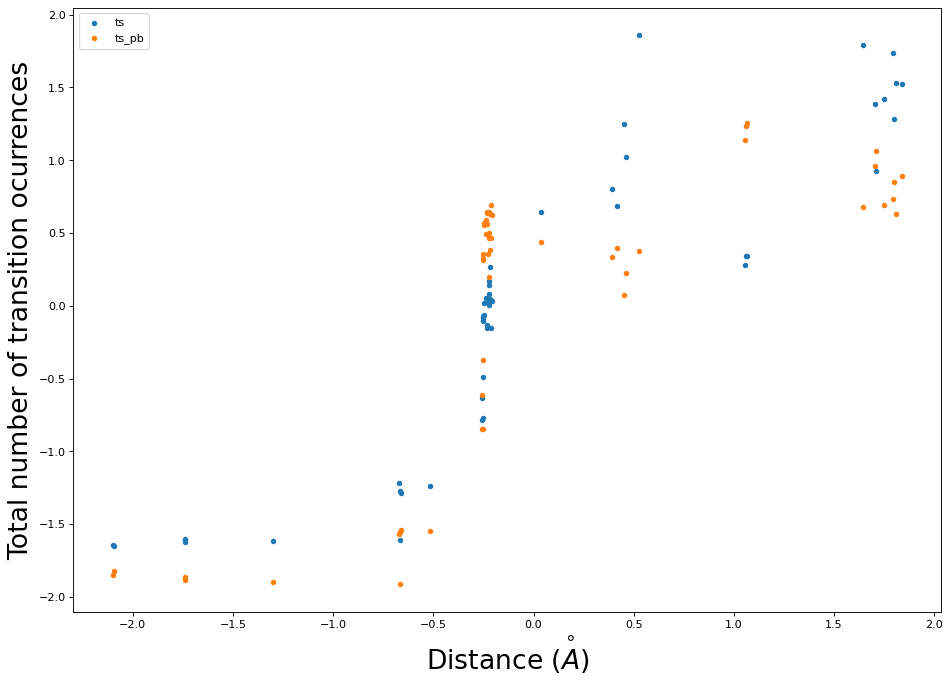

In [74]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

fwe = ((np.array(foscwe_all_sum)+np.array(foscwe_all_sum_2))-mean_xray_f)/std_xray_f
ts = (np.array(ts_pop_sum)+np.array(ts_pop_sum_2)-mean_xray)/std_xray
ts_pb = (np.array(tspb_pop_sum)+np.array(tspb_pop_sum_2)-mean_xray_ts)/std_xray_ts

n1.scatter(fwe, ts, s=15, label='ts', cmap = "coolwarm")
n1.scatter(fwe, ts_pb, s=15, label='ts_pb', cmap = "coolwarm")
#label='MO having upper 67% Loewdin population contribution'


plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total number of transition ocurrences')
plt.legend(loc='upper left');
#plt.xlim([-2,1])
#plt.ylim([-0.015,0.03])
plt.show()

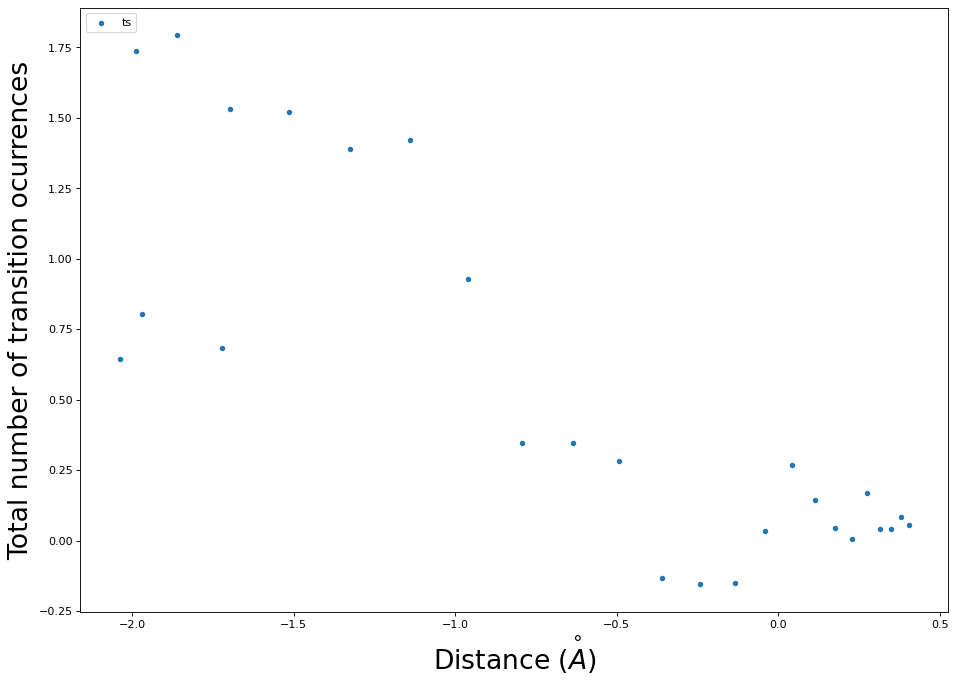

In [75]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

fmo_t = (eda_fy['total']-mean_fmo)/std_fmo

n1.scatter(fmo_t[4:30], ts[4:30], s=15, label='ts', cmap = "coolwarm")
#n1.scatter(fmo_t, ts_pb, s=15, label='ts_pb', cmap = "coolwarm")
#label='MO having upper 67% Loewdin population contribution'


plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total number of transition ocurrences')
plt.legend(loc='upper left');
#plt.xlim([-2,1])
#plt.ylim([-0.015,0.03])
plt.show()

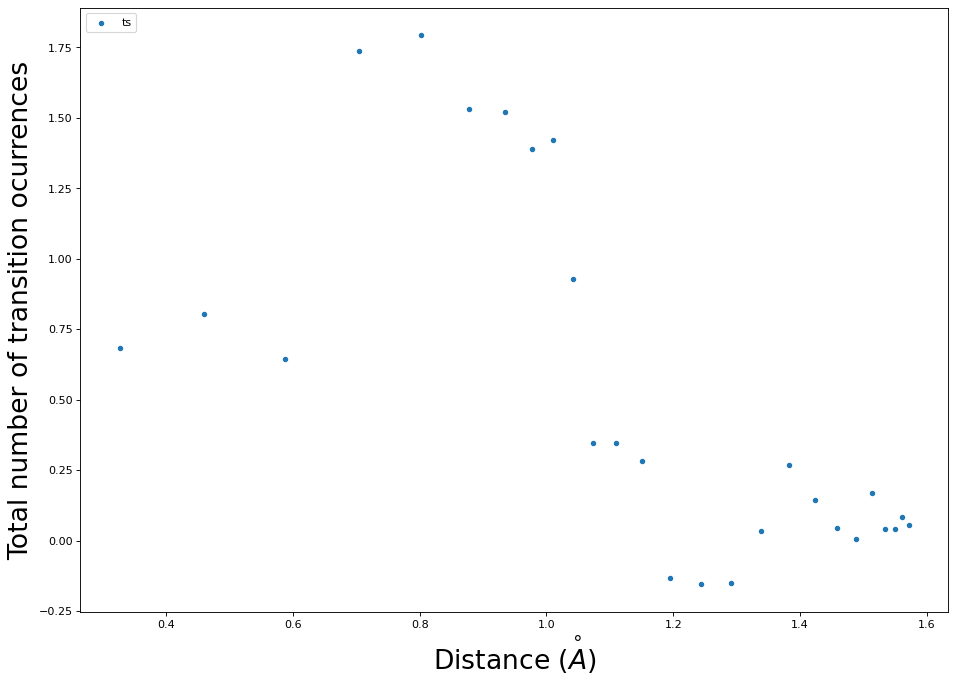

In [76]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

fmo_ct = (eda_fy['Ect+mix']-mean_ct)/std_ct
fmo_ct_exp = np.exp((eda_fy['Ect+mix']-mean_ct)/std_ct)
#n1.scatter(fmo_ct, ts_pb, s=15, label='ts_pb', cmap = "coolwarm")
#n1.scatter(fmo_ct[4:30], ts[4:30], s=15, label='ts', cmap = "coolwarm")
n1.scatter(fmo_ct_exp[4:30], ts[4:30], s=15, label='ts', cmap = "coolwarm")
#label='MO having upper 67% Loewdin population contribution'


plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total number of transition ocurrences')
plt.legend(loc='upper left');
#plt.xlim([-1,0.5])
#plt.ylim([-0.1,1])
plt.show()

In [77]:
ts[4:30]

array([ 0.68312962,  0.8052009 ,  0.64428876,  1.73738153,  1.79286847,
        1.53207984,  1.52098245,  1.38781379,  1.42110596,  0.92727217,
        0.34465928,  0.34465928,  0.28362364, -0.13252843, -0.1547232 ,
       -0.14917451,  0.0339324 ,  0.26697756,  0.14490628,  0.04502979,
        0.00618893,  0.16710106,  0.03948109,  0.03948109,  0.08387065,
        0.05612718])

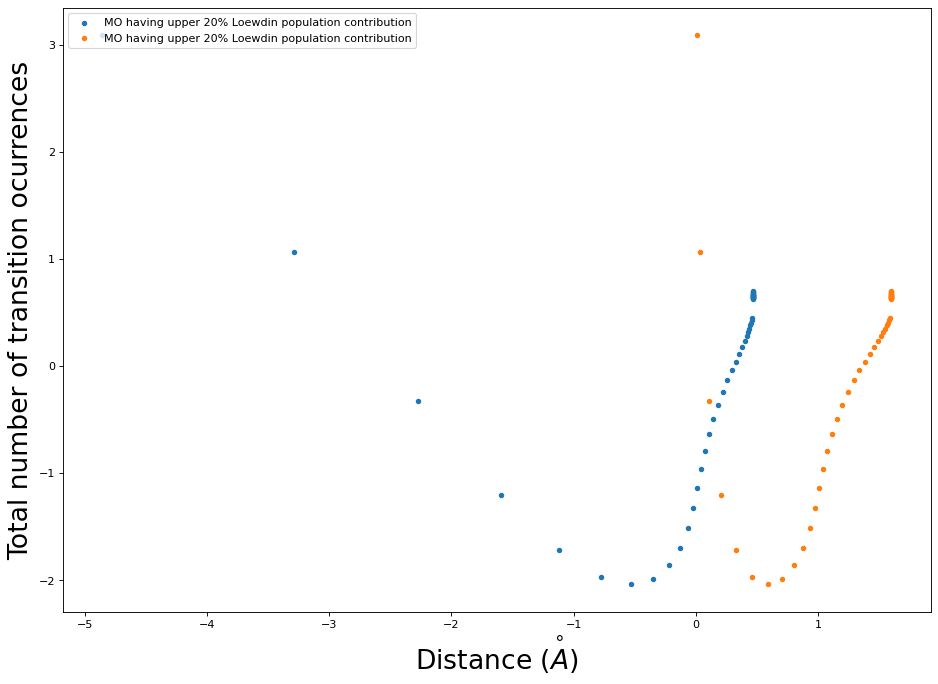

In [78]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#n1.scatter(x_ct, y_ts, s=15, label='MO having upper 20% Loewdin population contribution', cmap = "coolwarm")
n1.scatter(fmo_ct, fmo_t, s=15, label='MO having upper 20% Loewdin population contribution', cmap = "coolwarm")
n1.scatter(fmo_ct_exp, fmo_t, s=15, label='MO having upper 20% Loewdin population contribution', cmap = "coolwarm")
#label='MO having upper 67% Loewdin population contribution'


plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total number of transition ocurrences')
plt.legend(loc='upper left');
#plt.xlim([0.03,1.56])
#plt.ylim([-0.015,0.03])
plt.show()

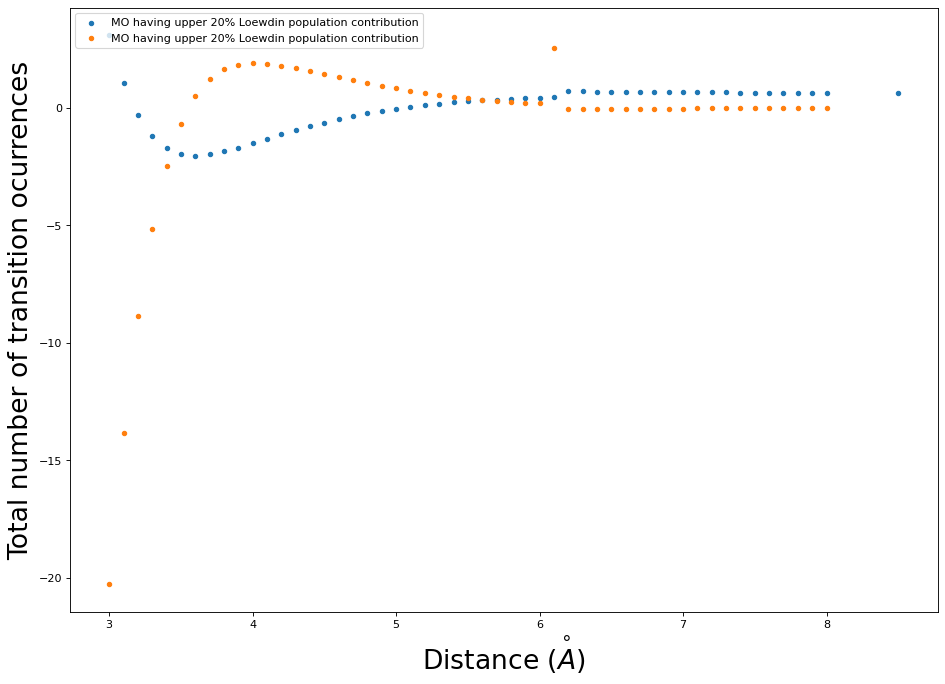

In [79]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

dists = [ii for ii in eda_fy['Distance']]
new_fmot = [(fmo_t[ii+1] - fmo_t[ii])/(dists[ii+1] - dists[ii]) \
            for ii in range(len(fmo_t)-1)]

n1.scatter(eda_fy[['Distance']], (fmo_t), s=15, label='MO having upper 20% Loewdin population contribution', cmap = "coolwarm")
#label='MO having upper 67% Loewdin population contribution'
n1.scatter(dists[:-1], new_fmot, s=15, label='MO having upper 20% Loewdin population contribution', cmap = "coolwarm")

plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total number of transition ocurrences')
plt.legend(loc='upper left');
#plt.xlim([0.03,1.56])
#plt.ylim([-0.015,0.03])
plt.show()

In [80]:
fmo_t[0]
fmot_df = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
new2_df_2 = pd.DataFrame({'Distance': [list_suf[cc+1]/10 for cc in range(len(list_suf)-1)], \
 'Intensity': [(global_name_cut_1[cc+1]['Intensity'] - \
                global_name_cut_1[cc]['Intensity'])/((list_suf[cc+1] - list_suf[cc])/10) for cc in range(len(list_suf)-1)]})


label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Intensity'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=1.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
n1.plot(x_arg, y_arg, data=new2_df_2, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
#n1.plot(x_arg, y_arg, data=new2_df, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Intensity (Oscillator strength)')
#plt.legend(loc='upper left');
plt.show()

NameError: name 'global_name_cut_1' is not defined

In [ ]:
len([ii for ii in eda_fy['Distance']])

##### dx,dy and dz correspond to the x-, y- and z-components of the transition moment (d)

### G$_{2}$YG$_{n}$FG$_ {11-n}$ ( $n=0..9$ )
#### optimized at PM7 and DFTB3-D3H4
#### by similarity

In [ ]:
#Uncomment the original range to see more peaks outside the expected range
resa_chphe="resA_MOcore_chainFY_"
resa_chtyr="resA_MOcore_chainYF_"
post=".csv"
list_suf = [10, 30, 50, 70, 90]

for ii in list_suf:
    globals()['resa_mocore_%s_chFY_raw' % str(ii)] = pd.read_csv(resa_chphe+str(ii)+post, delimiter=',', index_col='num-1')
    globals()['resa_mocore_%s_chYF_raw' % str(ii)] = pd.read_csv(resa_chtyr+str(ii)+post, delimiter=',', index_col='num-1')

resa_mocore_10_chFY_raw#.head()
#resa_mocore_27_YF_raw

In [ ]:
#Uncomment the original range to see more peaks outside the expected range
file=""
post="_opt_gms.csv"
g2ypg11 = pd.read_csv(file+'G2YPG11'+post, delimiter=',')
g2ygpg10 = pd.read_csv(file+'G2YGPG10'+post, delimiter=',')
g2yg2pg9 = pd.read_csv(file+'G2YG2PG9'+post, delimiter=',')
g2yg3pg8 = pd.read_csv(file+'G2YG3PG8'+post, delimiter=',')
g2yg4pg7 = pd.read_csv(file+'G2YG4PG7'+post, delimiter=',')
g2yg5pg6 = pd.read_csv(file+'G2YG5PG6'+post, delimiter=',')
g2yg6pg5 = pd.read_csv(file+'G2YG6PG5'+post, delimiter=',')
g2yg7pg4 = pd.read_csv(file+'G2YG7PG4'+post, delimiter=',')
g2yg8pg3 = pd.read_csv(file+'G2YG8PG3'+post, delimiter=',')
g2yg9pg2 = pd.read_csv(file+'G2YG9PG2'+post, delimiter=',')
g2yg12 = pd.read_csv(file+'G2YG12'+post, delimiter=',')
g4pg10 = pd.read_csv(file+'G4PG10'+post, delimiter=',')

g2ypg11.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2ygpg10.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg2pg9.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg3pg8.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg4pg7.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg5pg6.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg6pg5.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg7pg4.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg8pg3.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg9pg2.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg12.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g4pg10.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']

g2yg9pg2

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
#n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
#n2.scatter(g2ygpg10[['Energy']],g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
#n2.scatter(g2yg2pg9[['Energy']],g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
#n2.scatter(g2yg3pg8[['Energy']],g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
#n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
#n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
n2.scatter(g2yg8pg3[['Energy']],g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
n2.scatter(g2yg9pg2[['Energy']],g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
n2.scatter(g2ygpg10[['Energy']],g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
n2.scatter(g2yg2pg9[['Energy']],g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
n2.scatter(g2yg3pg8[['Energy']],g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
#n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
#n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
#n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
#n2.scatter(g2yg8pg3[['Energy']],g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
#n2.scatter(g2yg9pg2[['Energy']],g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
#n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
#n2.scatter(g2ygpg10[['Energy']],g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
#n2.scatter(g2yg2pg9[['Energy']],g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
#n2.scatter(g2yg3pg8[['Energy']],g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
#n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
#n2.scatter(g2yg8pg3[['Energy']],g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
#n2.scatter(g2yg9pg2[['Energy']],g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
#n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
#n2.scatter(g2ygpg10[['Energy']]-0.05,g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
#n2.scatter(g2yg2pg9[['Energy']]-0.13,g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
#n2.scatter(g2yg3pg8[['Energy']]-0.21,g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
#n2.scatter(g2yg8pg3[['Energy']]-0.4,g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
#n2.scatter(g2yg9pg2[['Energy']]-0.25,g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
n2.scatter(g2yg12[['Energy']],g2yg12[['Intensity']], s=5, label='G2YG12')
n2.scatter(g4pg10[['Energy']],g4pg10[['Intensity']], s=5, label='G4PG10')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()